In [4]:
pip install numpy==1.26.4

In [5]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import random

from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot
from matplotlib import pyplot as plt

from scipy.stats import boxcox

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.graphics.tsaplots import plot_acf, acf

In [6]:
# read the file jj.csv
csvFile = "sample_data/jj.csv"
jj_series = read_csv(csvFile, header=0, index_col=0)

In [7]:
jj_series

,data
date,
1960-01-01,0.71
1960-04-01,0.63
1960-07-02,0.85
1960-10-01,0.44
1961-01-01,0.61
...,...
1979-10-01,9.99
1980-01-01,16.20
1980-04-01,14.67


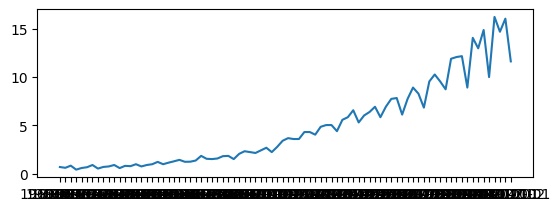

In [8]:
# making plots of the data
pyplot.figure(1)
#line plot
pyplot.subplot(211)
pyplot.plot(jj_series)

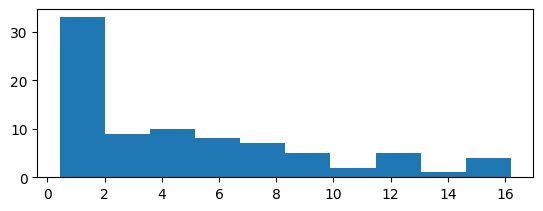

In [9]:
# plot a histogram
pyplot.subplot(212)
pyplot.hist(jj_series)
pyplot.show()

In [10]:
# read the file jj.csv
jj_series = read_csv(csvFile, header=0, index_col=0)

dataframe = DataFrame(jj_series.values)
dataframe.columns = ['data']

In [11]:
dataframe

,data
0,0.71
1,0.63
2,0.85
3,0.44
4,0.61
...,...
79,9.99
80,16.20
81,14.67
82,16.02


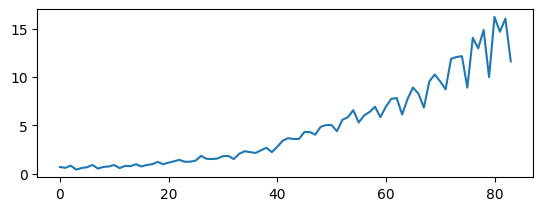

In [12]:
# making plots of the data
pyplot.figure(1)
#line plot
pyplot.subplot(211)
pyplot.plot(dataframe['data'])

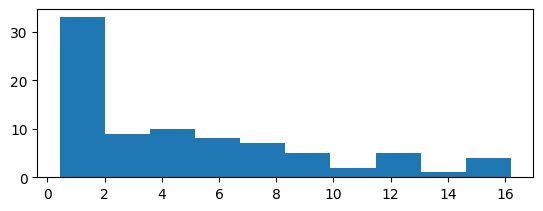

In [13]:
#histogram
pyplot.subplot(212)
pyplot.hist(dataframe['data'])
pyplot.show()

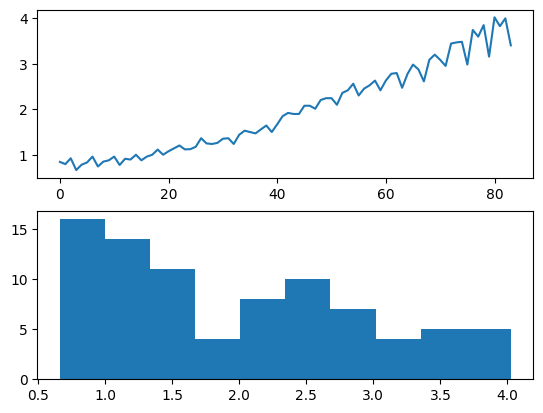

In [14]:
# using sqrt()
dataframe['data'] = sqrt(dataframe['data'])
# making plots of the data
pyplot.figure(1)
#line plot
pyplot.subplot(211)
pyplot.plot(dataframe['data'])
#histogram
pyplot.subplot(212)
pyplot.hist(dataframe['data'])
pyplot.show()

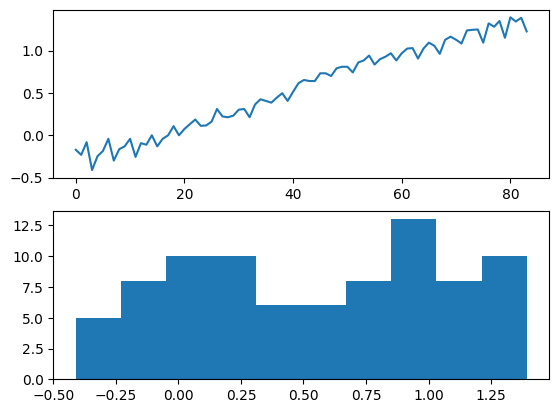

In [15]:
# Box-Cox transform
dataframe['data'] = boxcox(dataframe['data'], lmbda=0.0)

data_boxcox = dataframe['data']

pyplot.figure(1)
#line plot
pyplot.subplot(211)
pyplot.plot(dataframe['data'])
#histogram
pyplot.subplot(212)
pyplot.hist(dataframe['data'])
pyplot.show()

<ipython-input-16-36a5587e43e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['data'], lam = boxcox(dataframe['data'])


Lambda: 0.848561


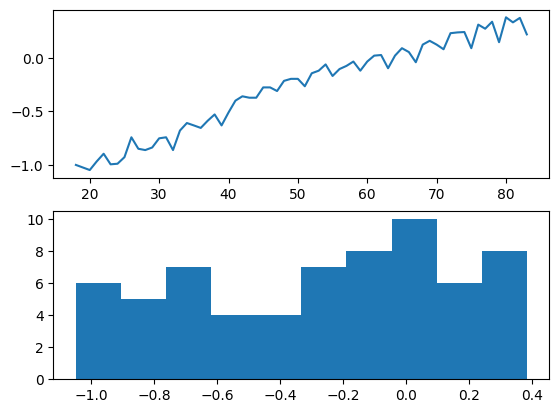

In [16]:
# find best lambda
dataframe = dataframe[dataframe['data'] > 0]
dataframe['data'], lam = boxcox(dataframe['data'])
#print lambda
print('Lambda: %f' %lam)

pyplot.figure(1)
#line plot
pyplot.subplot(211)
pyplot.plot(dataframe['data'])
#histogram
pyplot.subplot(212)
pyplot.hist(dataframe['data'])
pyplot.show()

In [17]:
# Classical decomposition
jj = read_csv(csvFile, index_col='date', parse_dates=True, dayfirst=False)
jj.index = pd.to_datetime(jj.index, format='%d/%m/%y')

freq = pd.infer_freq(jj.index)
if freq:
  jj.index.freq = freq
# jj.index.freq = 'MS'

jj.index

DatetimeIndex(['1960-01-01', '1960-04-01', '1960-07-02', '1960-10-01',
               '1961-01-01', '1961-04-02', '1961-07-02', '1961-10-01',
               '1962-01-01', '1962-04-02', '1962-07-02', '1962-10-01',
               '1963-01-01', '1963-04-02', '1963-07-02', '1963-10-01',
               '1964-01-01', '1964-04-01', '1964-07-02', '1964-10-01',
               '1965-01-01', '1965-04-02', '1965-07-02', '1965-10-01',
               '1966-01-01', '1966-04-02', '1966-07-02', '1966-10-01',
               '1967-01-01', '1967-04-02', '1967-07-02', '1967-10-01',
               '1968-01-01', '1968-04-01', '1968-07-02', '1968-10-01',
               '1969-01-01', '1969-04-02', '1969-07-02', '1969-10-01',
               '1970-01-01', '1970-04-02', '1970-07-02', '1970-10-01',
               '1971-01-01', '1971-04-02', '1971-07-02', '1971-10-01',
               '1972-01-01', '1972-04-01', '1972-07-02', '1972-10-01',
               '1973-01-01', '1973-04-02', '1973-07-02', '1973-10-01',
      

In [18]:
# simple moving averages
# 6 months SMA
jj['6-month-SMA'] = jj['data'].rolling(window=6).mean()

jj['12-month-SMA'] = jj['data'].rolling(window=12).mean()
bool_series = jj.duplicated()

<Axes: title={'center': 'Simple Moving Averages'}, xlabel='date'>

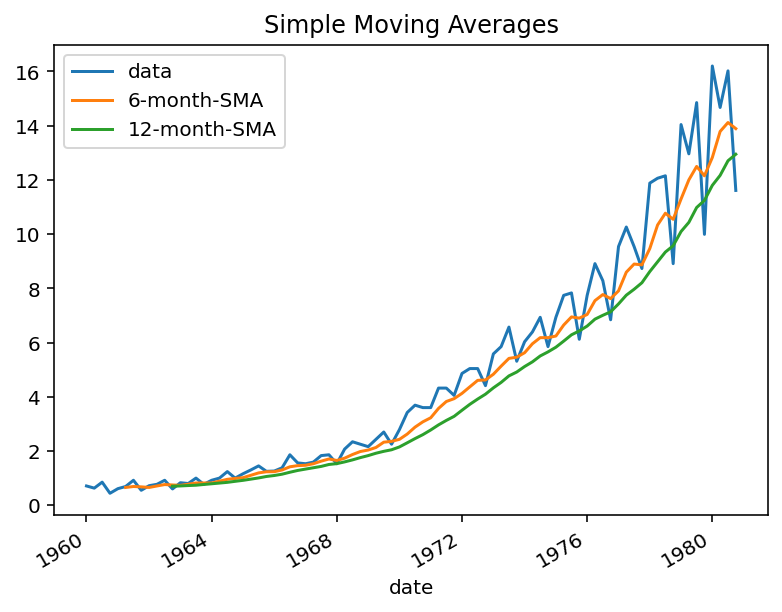

In [19]:
fix, ax = pyplot.subplots(dpi=144)
jj.plot(title="Simple Moving Averages", ax= ax)

In [20]:
# remove the trend component
jj['s_dash_t'] = jj['data'] - jj['12-month-SMA']

<Axes: title={'center': 'Trend Removed'}, xlabel='date'>

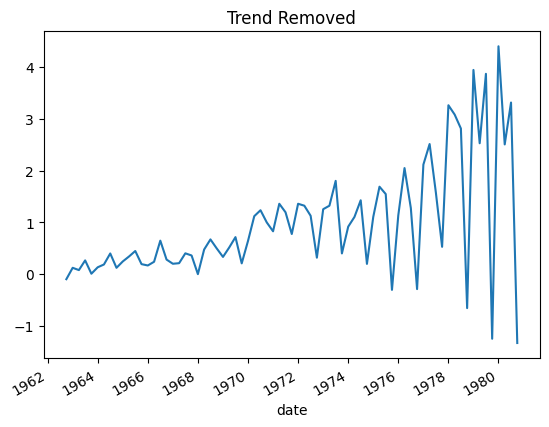

In [21]:
jj['s_dash_t'].plot(title='Trend Removed')

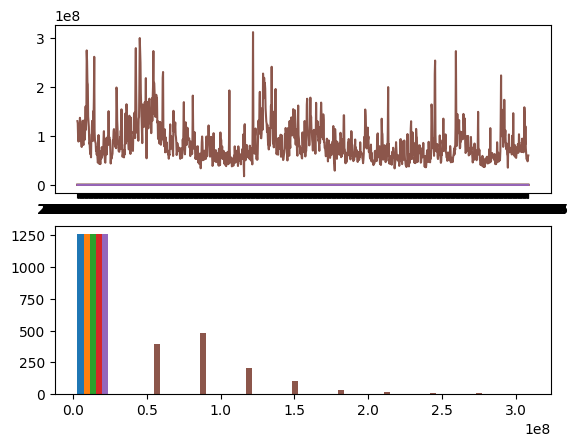

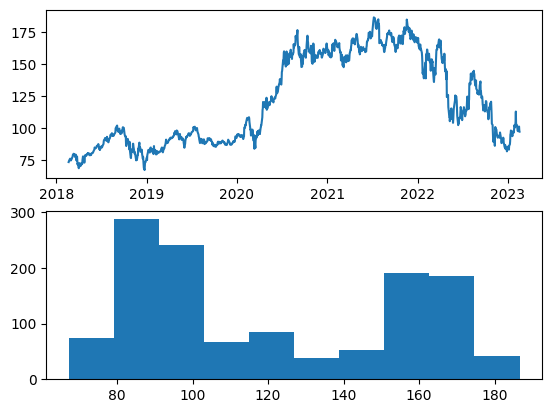

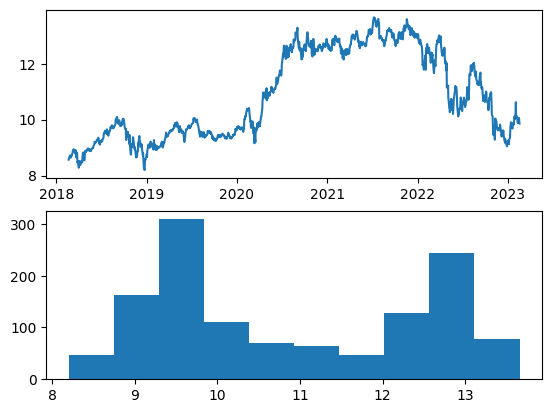

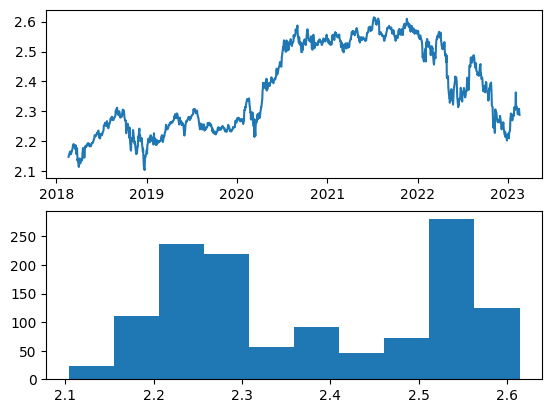

Lambda: -1.167072


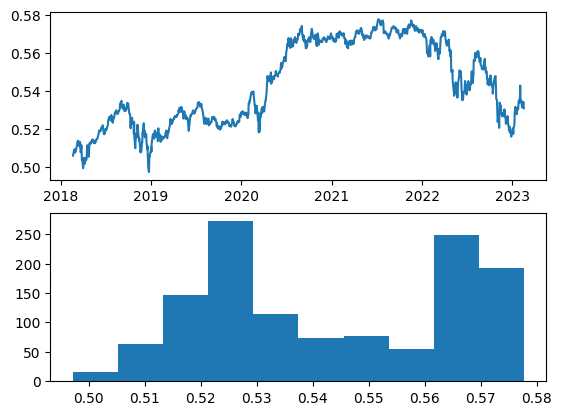

<Axes: title={'center': 'Trend Removed'}, xlabel='Date'>

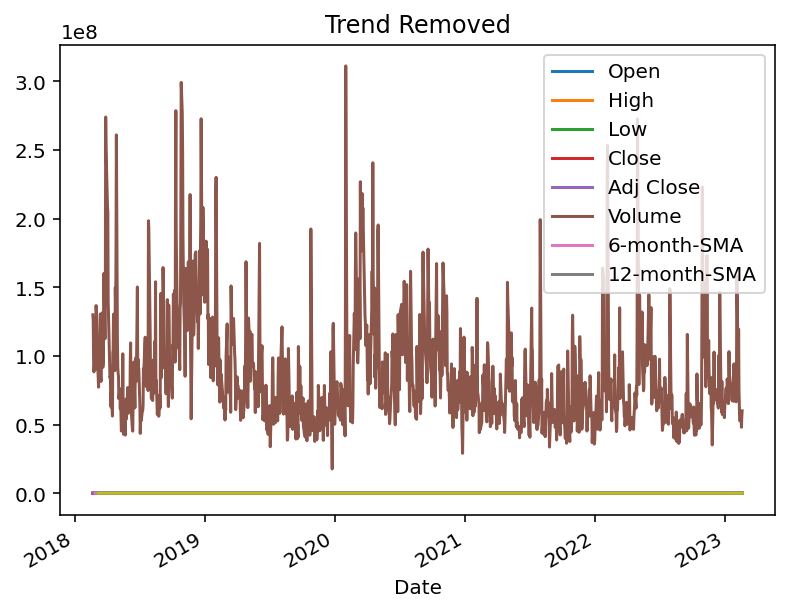

In [22]:
# performing the above tasks with AMZN.csv dataset
# read the file AMZN.csv
csvFile2 = "sample_data/AMZN.csv"
AMZN_series = read_csv(csvFile2, header=0, index_col=0)

# making plots of the data
pyplot.figure(1)
#line plot
pyplot.subplot(211)
pyplot.plot(AMZN_series)

# plot a histogram
pyplot.subplot(212)
pyplot.hist(AMZN_series)
pyplot.show()

# read the file AMZN.csv
AMZN_series = read_csv(csvFile2, header=0, index_col='Date', parse_dates=True)

AMZN_series.head()

# making plots of the data
pyplot.figure(1)
#line plot
pyplot.subplot(211)
pyplot.plot(AMZN_series['Close'])

#histogram
pyplot.subplot(212)
pyplot.hist(AMZN_series['Close'])
pyplot.show()

# using sqrt()
AMZN_series['Close'] = sqrt(AMZN_series['Close'])
# making plots of the data
pyplot.figure(1)
#line plot
pyplot.subplot(211)
pyplot.plot(AMZN_series['Close'])
#histogram
pyplot.subplot(212)
pyplot.hist(AMZN_series['Close'])
pyplot.show()

# Box-Cox transform
AMZN_series['Close'] = boxcox(AMZN_series['Close'], lmbda=0.0)

data_boxcox = AMZN_series['Close']

pyplot.figure(1)
#line plot
pyplot.subplot(211)
pyplot.plot(AMZN_series['Close'])
#histogram
pyplot.subplot(212)
pyplot.hist(AMZN_series['Close'])
pyplot.show()

# find best lambda
dataframe = AMZN_series[AMZN_series['Close'] > 0]
AMZN_series['Close'], lam = boxcox(AMZN_series['Close'])
#print lambda
print('Lambda: %f' %lam)

pyplot.figure(1)
#line plot
pyplot.subplot(211)
pyplot.plot(AMZN_series['Close'])
#histogram
pyplot.subplot(212)
pyplot.hist(AMZN_series['Close'])
pyplot.show()

# Classical decomposition
AMZN = read_csv(csvFile2, index_col='Date', parse_dates=True, dayfirst=False)
AMZN.index = pd.to_datetime(AMZN.index, format='%d/%m/%y')

freq = pd.infer_freq(AMZN.index)
if freq:
  AMZN.index.freq = freq

# AMZN.index

# simple moving averages
# 6 months SMA
AMZN['6-month-SMA'] = AMZN['Close'].rolling(window=6).mean()

AMZN['12-month-SMA'] = AMZN['Close'].rolling(window=12).mean()
bool_series = AMZN.duplicated()

fix, ax = pyplot.subplots(dpi=144)
AMZN.plot(title="Simple Moving Averages", ax= ax)

# remove the trend component
AMZN['s_dash_t'] = AMZN['Close'] - AMZN['12-month-SMA']

AMZN['s_dash_t'].plot(title='Trend Removed')

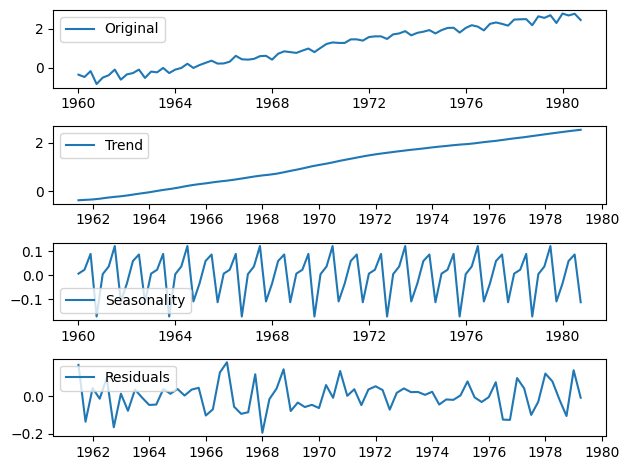

In [23]:
# Decomposing the time series
jj = read_csv(csvFile, index_col='date', parse_dates=True, dayfirst=False)
jj.index = pd.to_datetime(jj.index, format='%d/%m/%y')

freq = pd.infer_freq(jj.index)
if freq:
  jj.index.freq = freq
# jj.index.freq = 'MS'

jj.head()

decomposition = seasonal_decompose(np.log(jj), period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(np.log(jj), label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

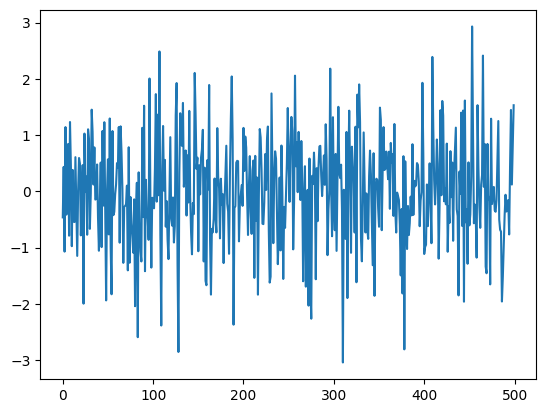

In [24]:
# simulating time series
mean = 0
std = 1
num_samples = 500
# make one random realisation
white_noise = np.random.normal(mean, std, size=num_samples)

plt.plot(white_noise)
plt.show()

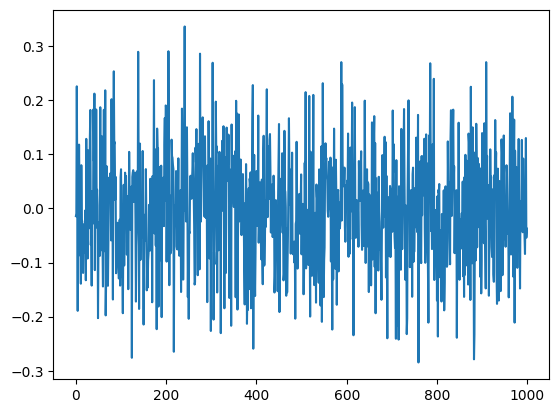

In [25]:
# can do it with Guassian and make a plot of the distribution
mu = 0
sigma = 0.1
s = np.random.normal(mu, sigma, size=1000)

plt.plot(s)
plt.show()

<ipython-input-26-754245b010d5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, bins=40, hist_kws={'edgecolor':'black'})


<Axes: ylabel='Density'>

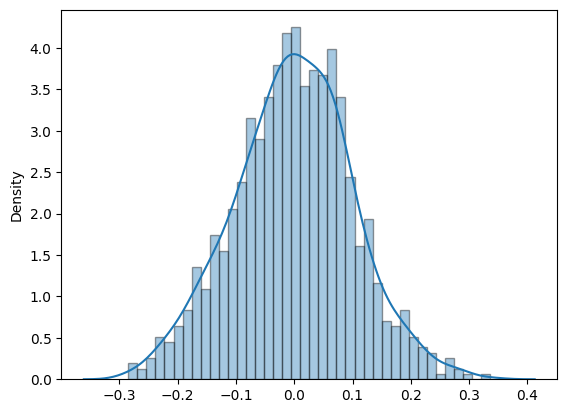

In [26]:
# seaborn histogram with Kernel Density Estimation
sns.distplot(s, bins=40, hist_kws={'edgecolor':'black'})

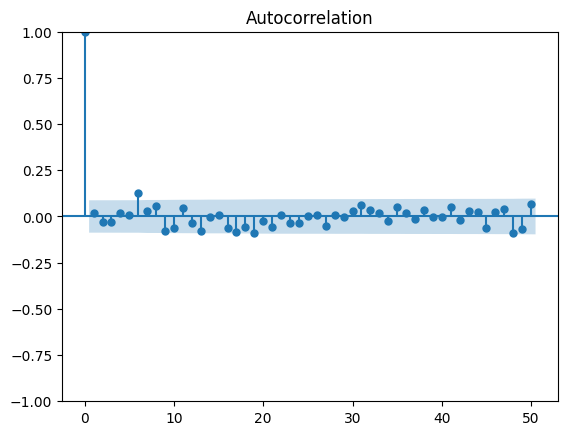

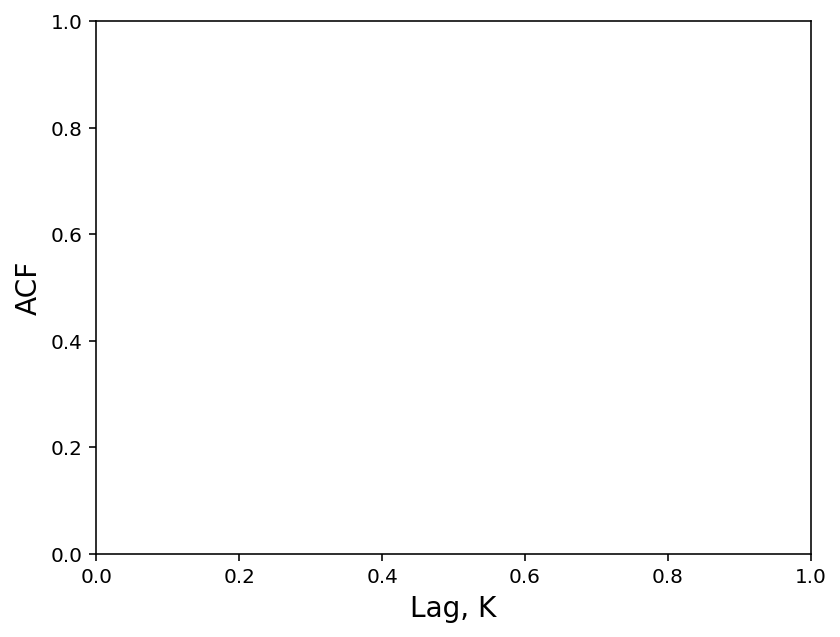

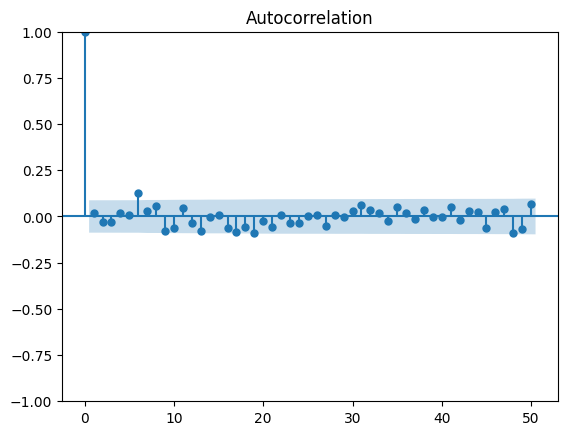

In [27]:
# ACF (Auto-Correlation Function)
acf_coef = acf(white_noise)

fig, ax = plt.subplots(dpi=144)
plt.xlabel('Lag, K', fontsize=14)
plt.ylabel('ACF', fontsize=14)
plot_acf(white_noise, lags=50)

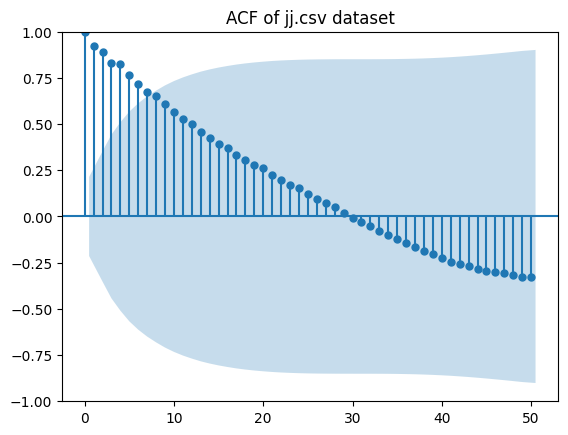

In [28]:
# the ACF of jj.csv dataset
plot_acf(jj_series, lags=50)
plt.title("ACF of jj.csv dataset")
plt.show()

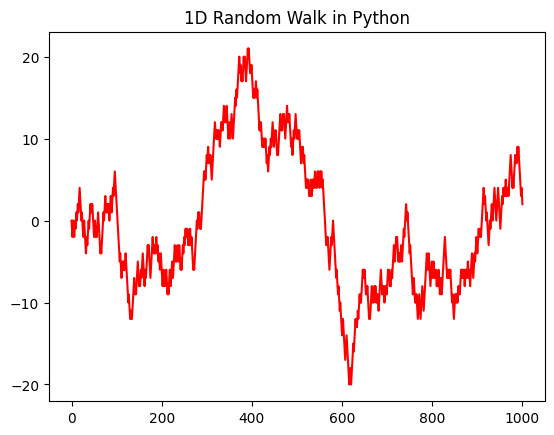

In [29]:
# Random Walk Time Series
# random walk from randomly selecting up and down for next move
def randomwalk1D(n):
  x= 0
  y = 0
  # generate the time points
  timepoints = np.arange(n + 1)
  positions = [y]
  directions = ["UP", "DOWN"]
  for i in range(1, n+1):
    # randomly select either UP or DOWN
    step = random.choice(directions)

    #move the object up or down
    if step == "UP":
      y +=1
    elif step == "DOWN":
      y -=1
    positions.append(y)
  return timepoints, positions

time_data, pos_data = randomwalk1D(1000)
plt.plot(time_data, pos_data, 'r-')
plt.title("1D Random Walk in Python")
plt.show()

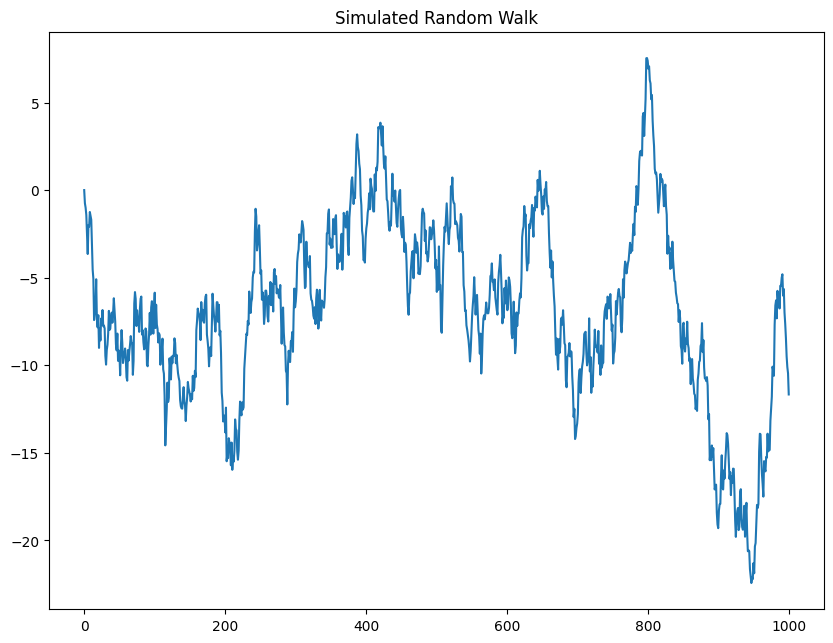

In [30]:
# another method to produce a random walk
from statsmodels.tsa.stattools import acf

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 7.5]

steps = np.random.standard_normal(1000)
steps[0] = 0
random_walk = np.cumsum(steps)

plt.plot(random_walk)
plt.title("Simulated Random Walk")
plt.show()

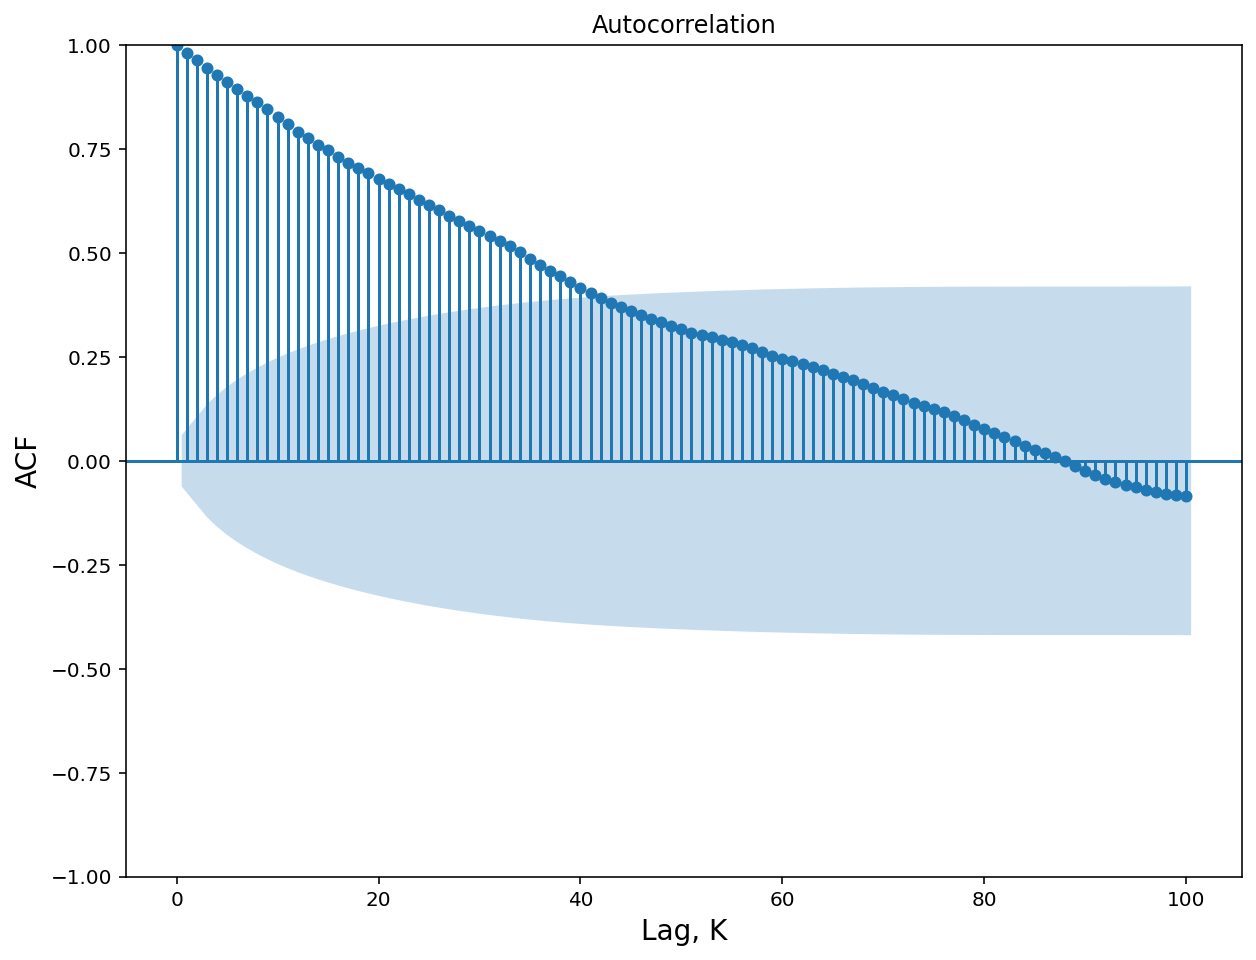

In [31]:
# computing and plotting the ACF of simulated random walks
random_walk_acf_coef = acf(random_walk)
fig, ax = plt.subplots(dpi=144)
plt.xlabel('Lag, K', fontsize=14)
plt.ylabel('ACF', fontsize=14)
plot_acf(random_walk, lags=100, ax=ax);

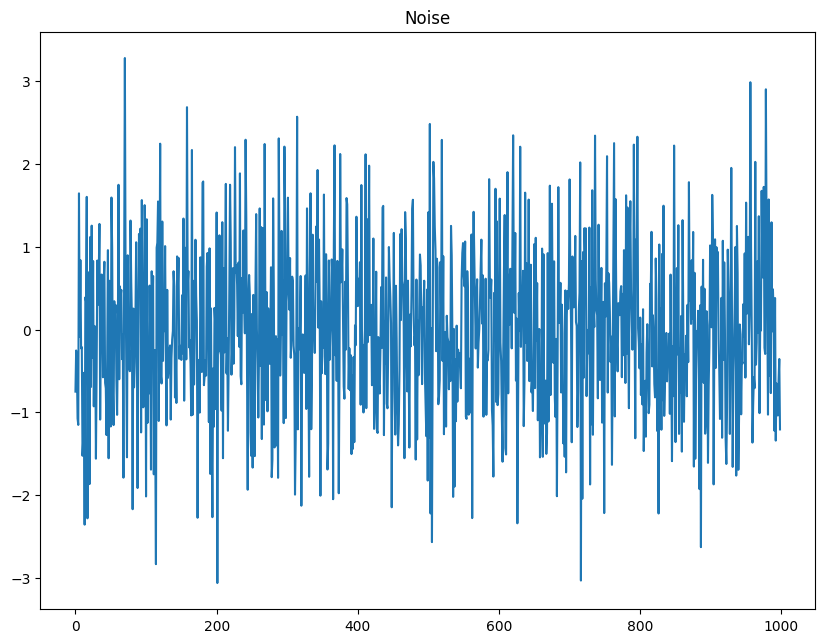

In [32]:
# differencing operator to remove non-stationarity
random_walk_diff = np.diff(random_walk, n=1)

plt.figure(figsize=[10, 7.5])
plt.plot(random_walk_diff)
plt.title('Noise')
plt.show()

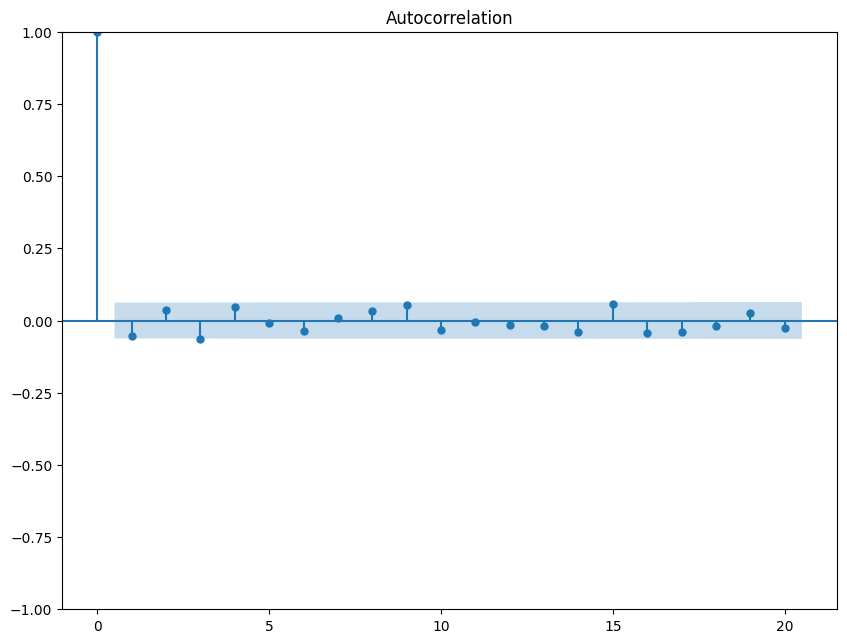

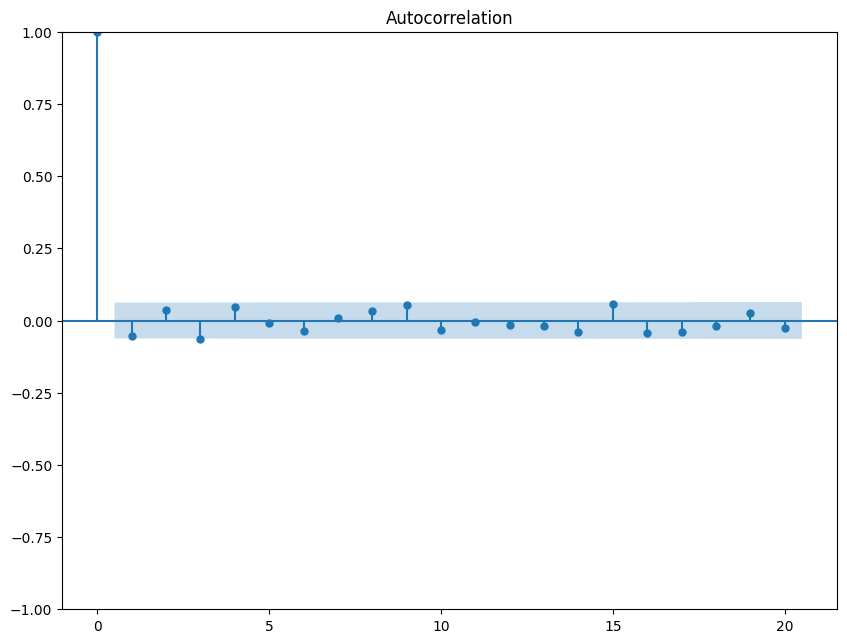

In [33]:
# checking how the ACF has changed
plot_acf(random_walk_diff, lags=20)

In [34]:
# Autoregressive (AR) models
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7.5)

In [35]:
# simulating AR(2) process
# AR coefficients
arparams = np.array([0.21, .45])
# MA coefs
maparams = np.array([.0, .0])

ar2 = np.r_[1, -arparams]
ma2 = np.r_[1, maparams]

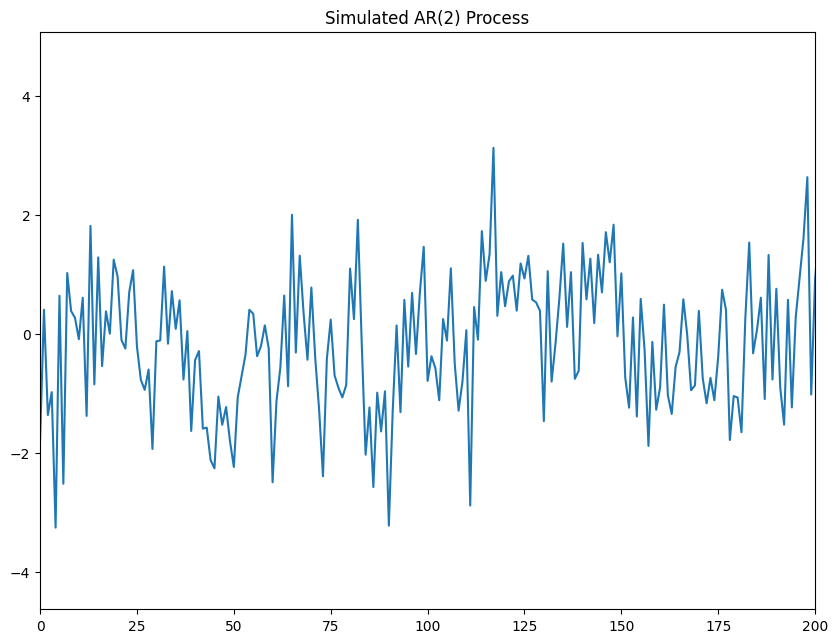

In [36]:
AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=3000)

plt.plot(AR2_process)
plt.title('Simulated AR(2) Process')
plt.xlim(0, 200)
plt.show()

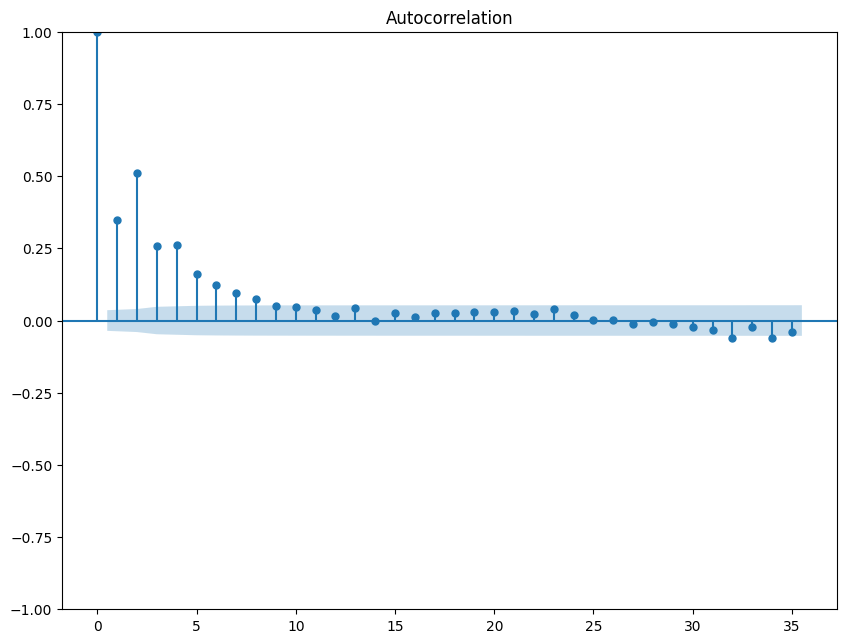

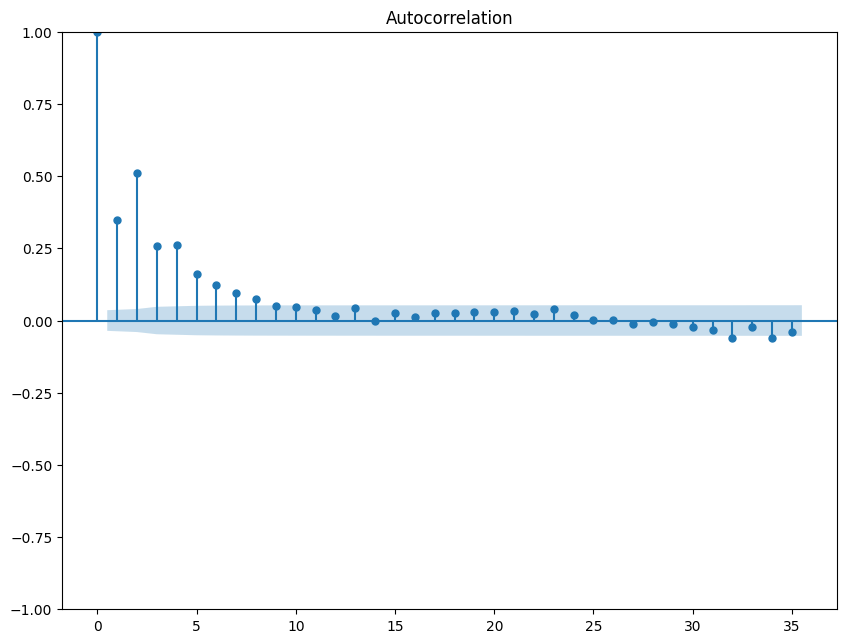

In [37]:
# checking the ACF of the simulated data
plot_acf(AR2_process)

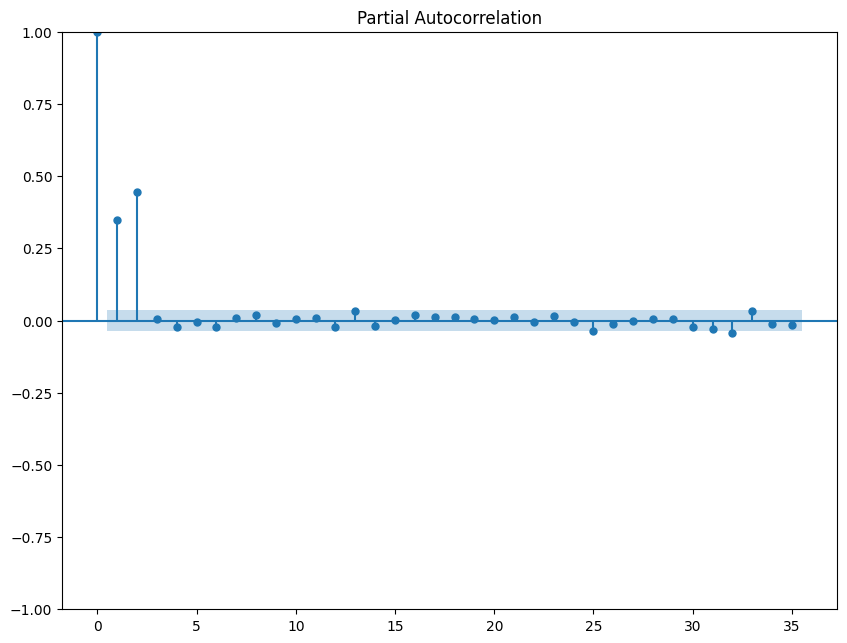

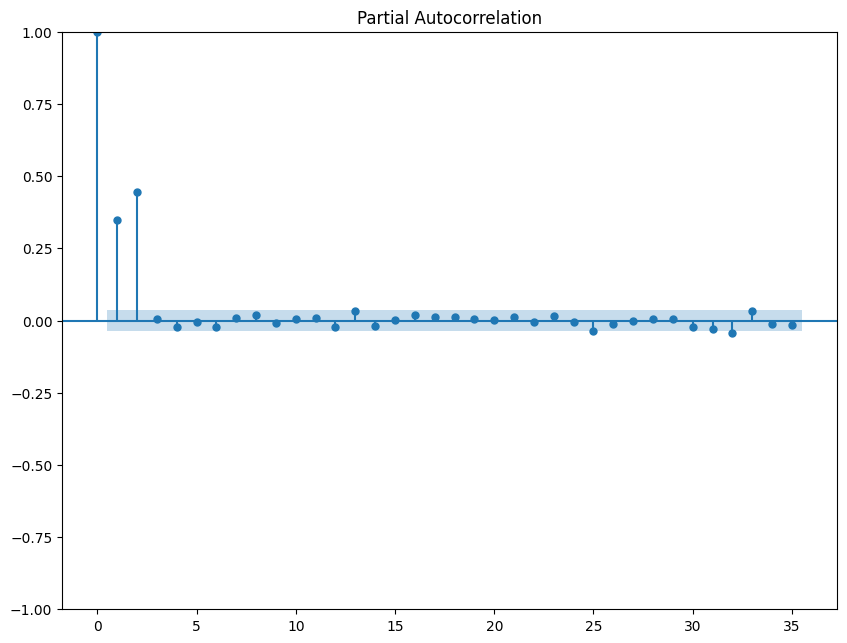

In [38]:
# plotting the PACF of the process
plot_pacf(AR2_process)

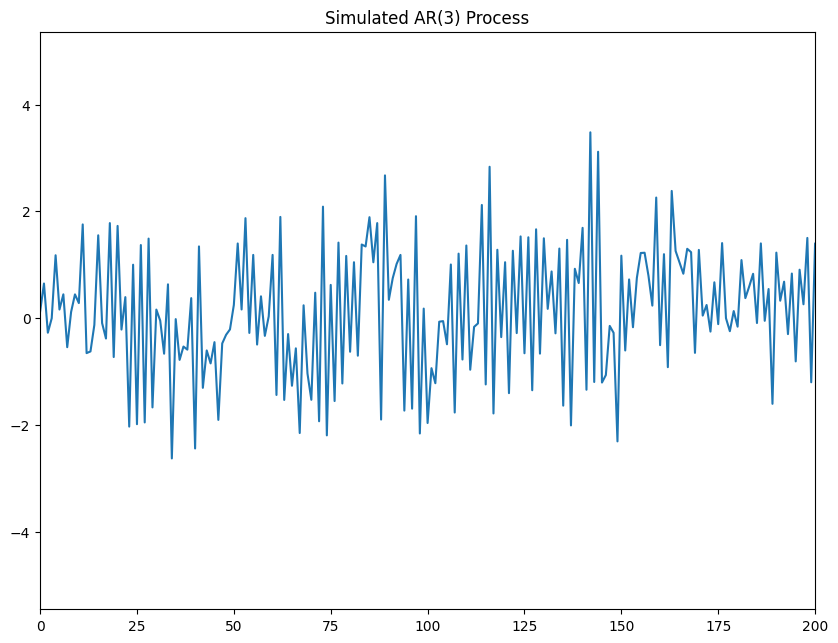

In [39]:
# simulating an AR(3) process
# parameters
arparams = np.array([-0.23, .55, 0.08])
maparams = np.array([.0, .0, .0])

ar3 = np.r_[1,  -arparams]
ma3 = np.r_[1, maparams]

AR3_process = ArmaProcess(ar3, ma3).generate_sample(nsample=10000)

plt.plot(AR3_process)
plt.title('Simulated AR(3) Process')
plt.xlim(0, 200)
plt.show()

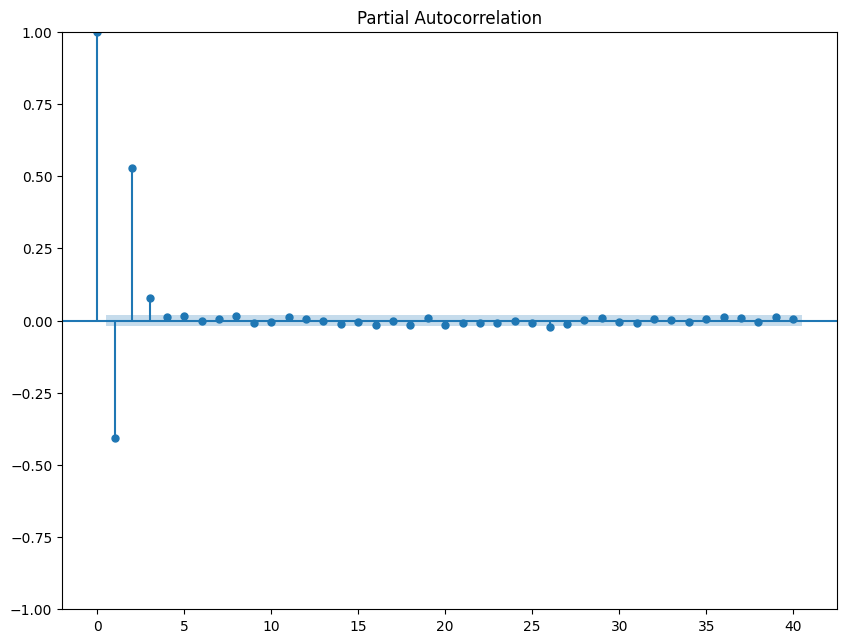

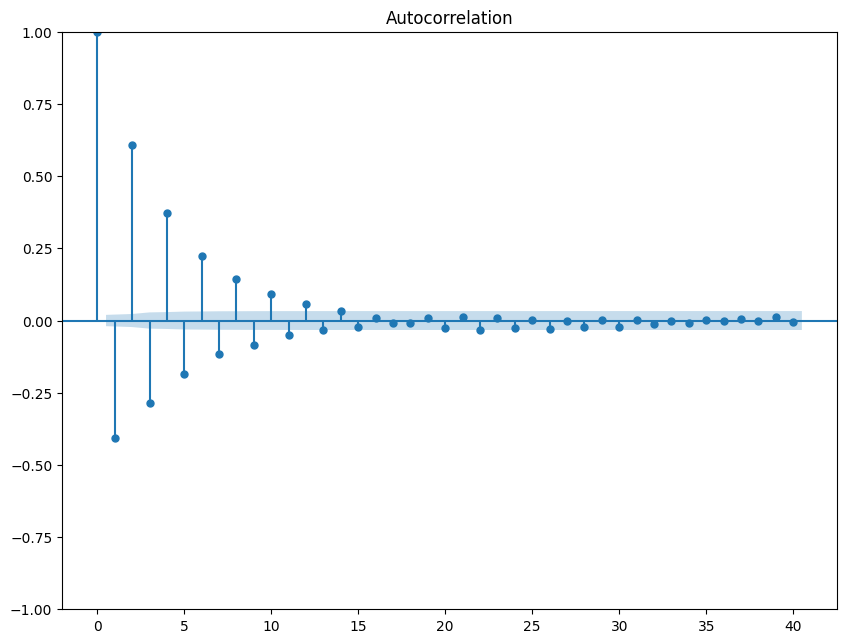

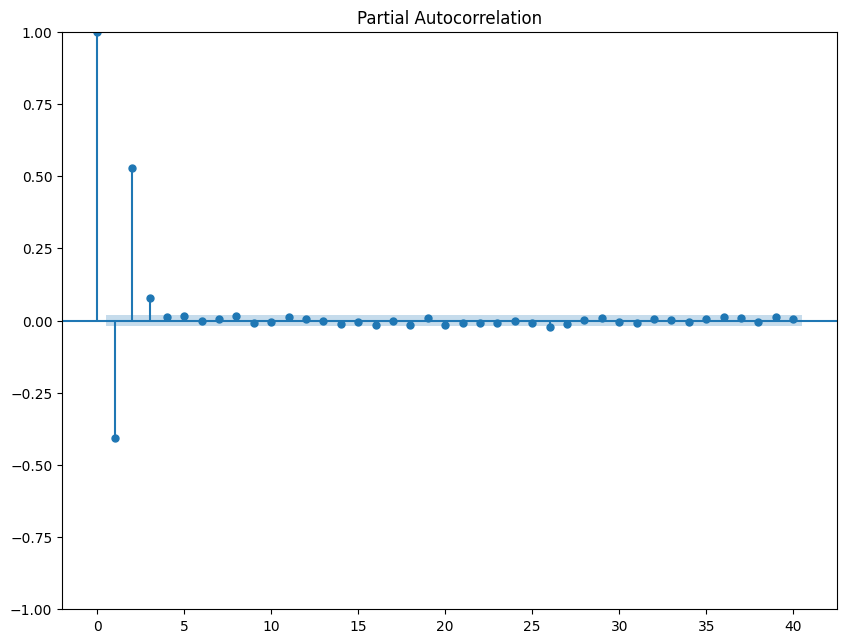

In [40]:
plot_acf(AR3_process)
plot_pacf(AR3_process)

In [41]:
# Moving average process
#simulating an MA(2) process
from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7.5)

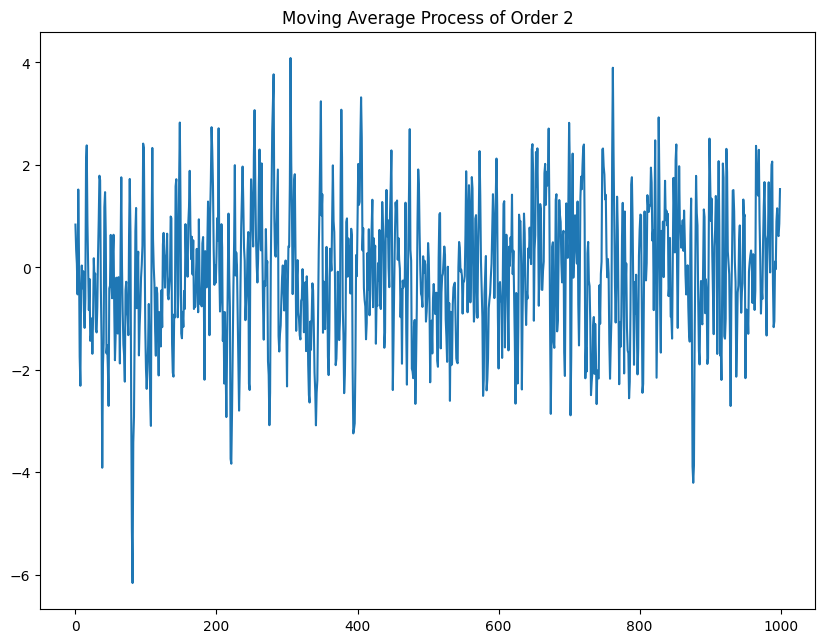

In [42]:
# setting up an array
ma2 = np.array([1, 0.8, 0.4])
ar2 = np.array([1, 0, 0])

arparams = np.array([.0, .0])
maparams = np.array([0.8, 0.4])

ar2 = np.r_[1, -arparams]
ma2 = np.r_[1, maparams]

#simulate
MA2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

plt.plot(MA2_process)
plt.title('Moving Average Process of Order 2')
plt.show()

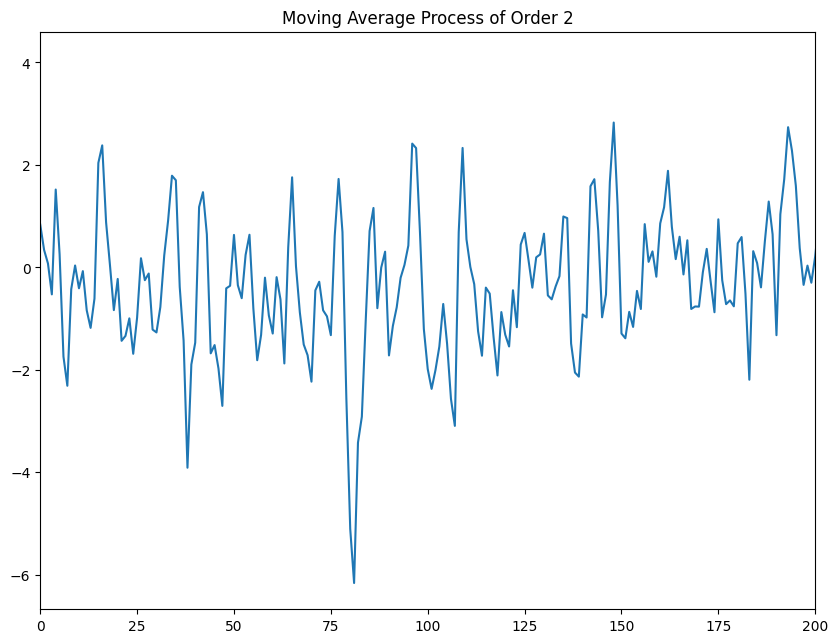

In [43]:
# zooming into shorter timescales
plt.plot(MA2_process)
plt.title('Moving Average Process of Order 2')
plt.xlim(0, 200)
plt.show()

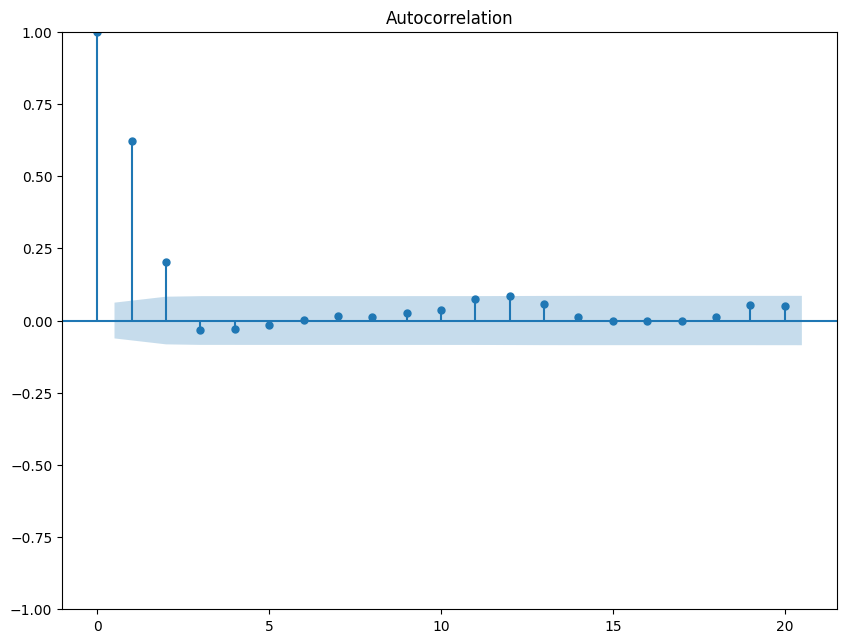

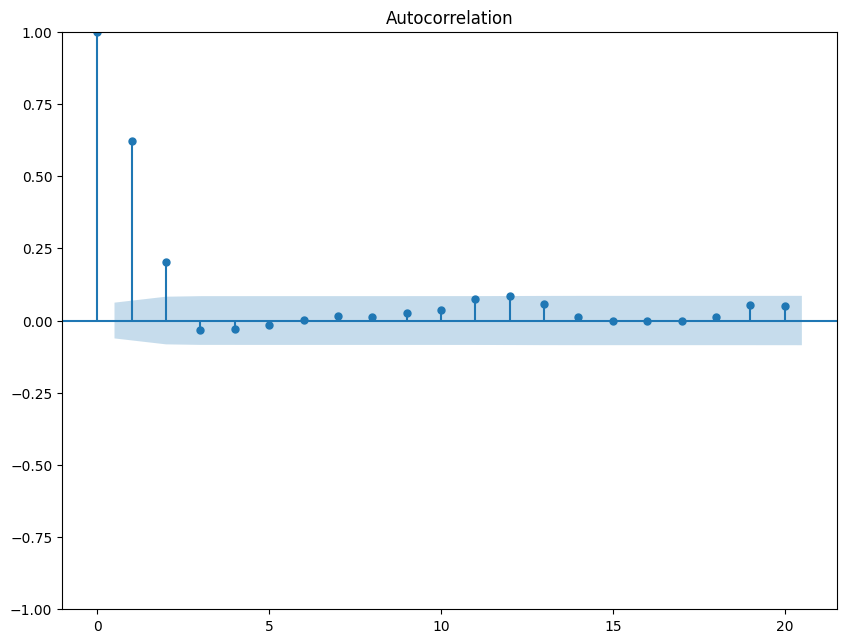

In [44]:
# plotting the ACF
plot_acf(MA2_process, lags=20)

In [45]:
# Estimating the coefficients
# estimating Yule Walker metric for the generated process
rho, sigma = yule_walker(AR2_process, 2, method='mle')
print(f'rho: {rho}')
print(f'sigma: {sigma}')

rho, sigma = yule_walker(AR3_process, 3, method='mle')
print(f'rho: {rho}')
print(f'sigma: {sigma}')

rho: [0.19365441 0.44402188]
sigma: 1.011267093161646
rho: [-0.23346579  0.54337644  0.0783011 ]
sigma: 0.9986861579509533


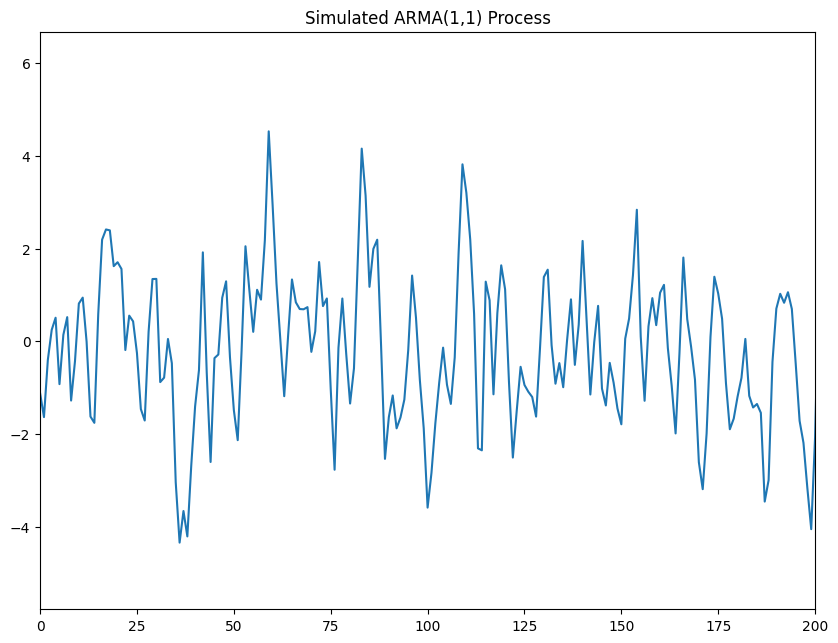

In [46]:
# ARMA models
# simulating the ARMA(1, 1) process
arparams = np.array([0.33])
maparams = np.array([0.9])

ar1 = np.r_[1, -arparams]
ma1 = np.r_[1, maparams]

ARMA_1 = ArmaProcess(ar1, ma1).generate_sample(nsample=1000)

plt.plot(ARMA_1)
plt.title('Simulated ARMA(1,1) Process')
plt.xlim(0, 200)
plt.show()

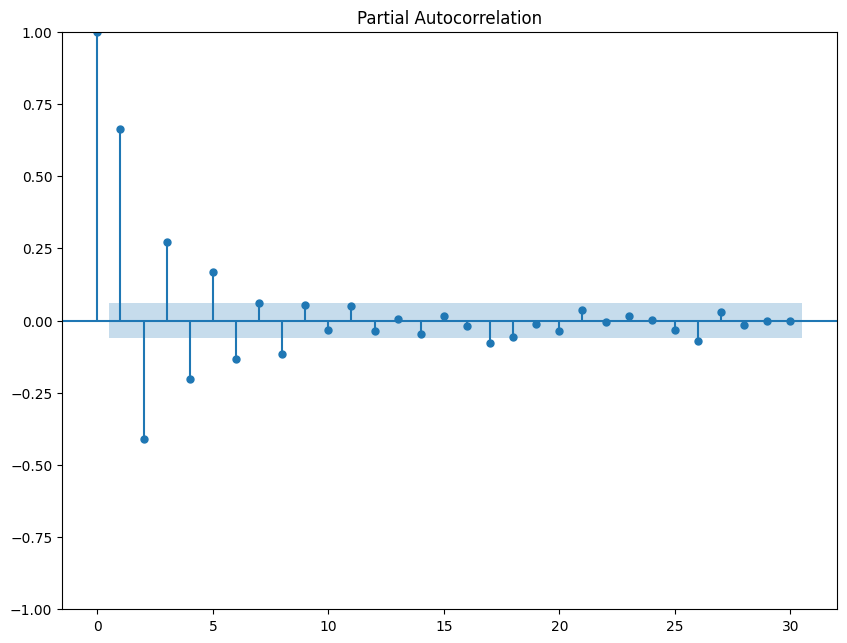

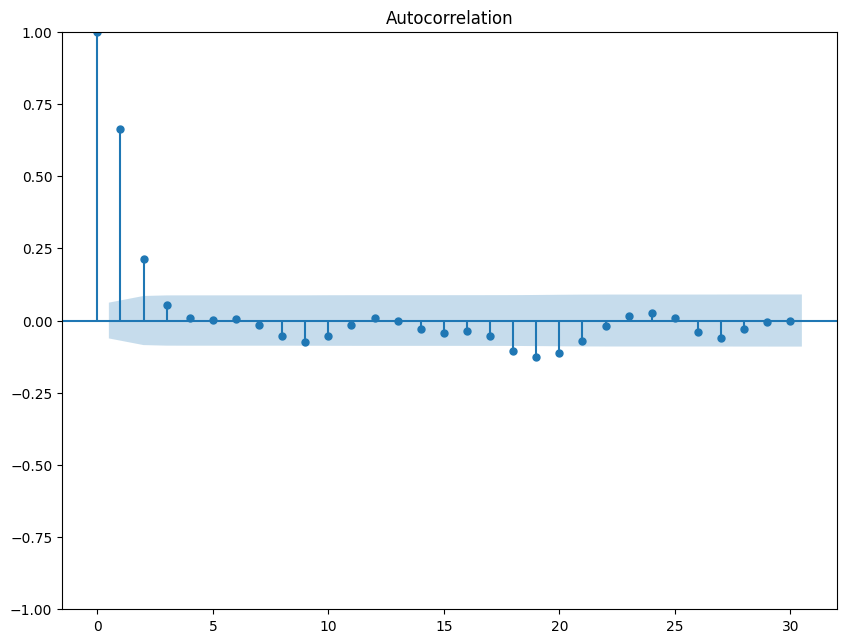

In [47]:
plot_pacf(ARMA_1);
plot_acf(ARMA_1);

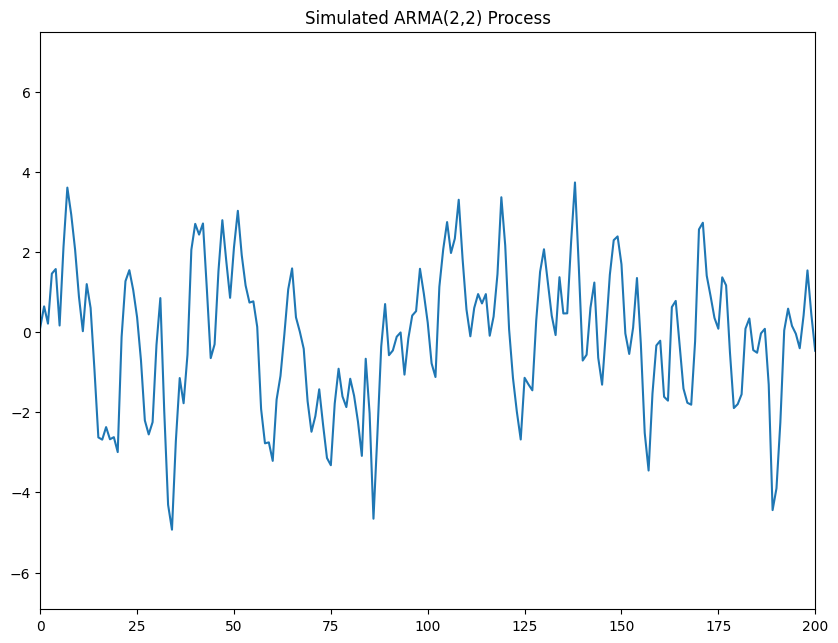

In [48]:
# simulating an ARMA(2,2) process
ar2 = np.array([1, 0.33, 0.5])
ma2 = np.array([1, 0.9, 0.3])

arparms = np.array([0.33, .5])
maparams = np.array([.9, .3])

ar2 = np.r_[1, -arparams]
ma2 = np.r_[1, maparams]

# simulate
ARMA_2 = ArmaProcess(ar2, ma2).generate_sample(nsample=10000)

plt.plot(ARMA_2)
plt.title('Simulated ARMA(2,2) Process')
plt.xlim(0, 200)
plt.show()

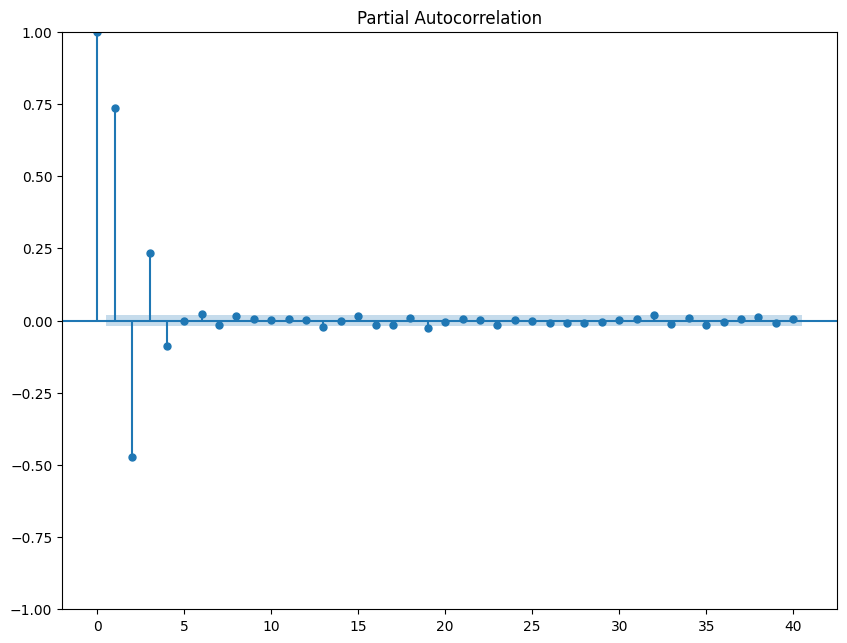

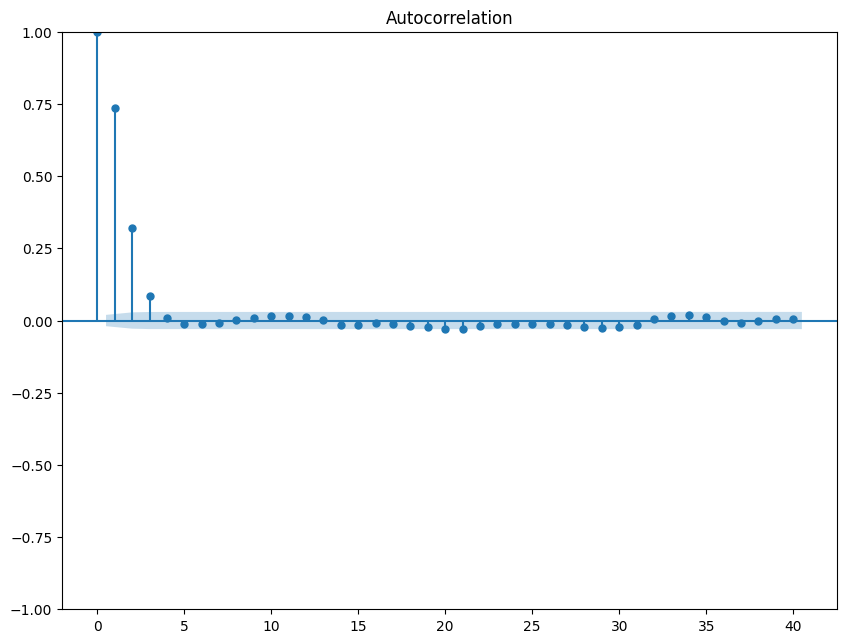

In [49]:
plot_pacf(ARMA_2);
plot_acf(ARMA_2);

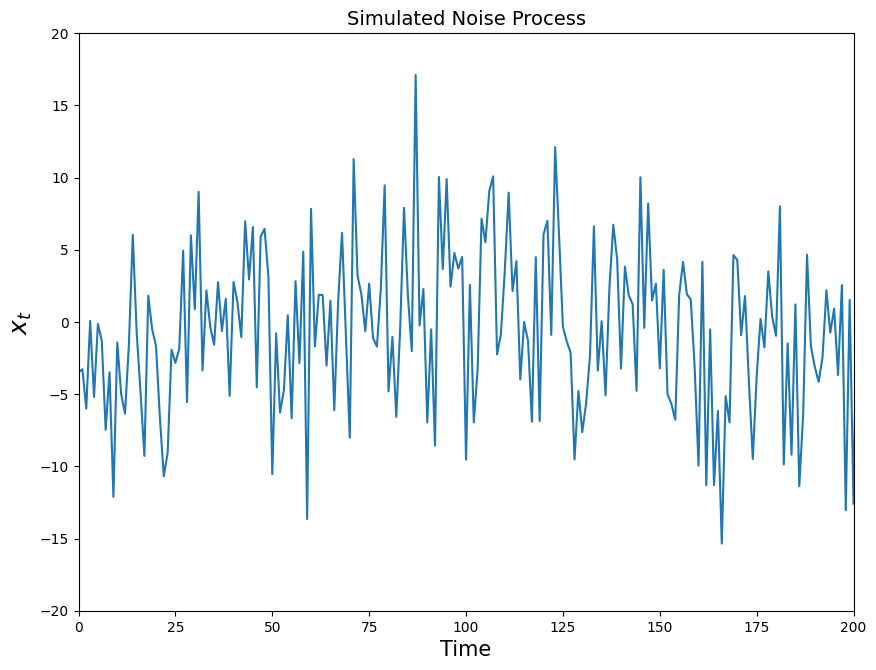

In [50]:
# model variants
arparams = np.array([-.7, .2])
maparams = np.array([.7, .0])
ar2 = np.r_[1, -arparams]
ma2 = np.r_[1, maparams]

# simulate
AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

x = np.linspace(0,1000,1000)
y = 0.0*x
process = 6*AR2_process + y

plt.plot(process)
plt.title('Simulated Noise Process', fontsize=14)
plt.xlabel('Time', fontsize=15)
plt.ylabel(r'$x_t$', fontsize=18)
plt.xlim(0, 200)
plt.ylim(-20, 20)
plt.show()

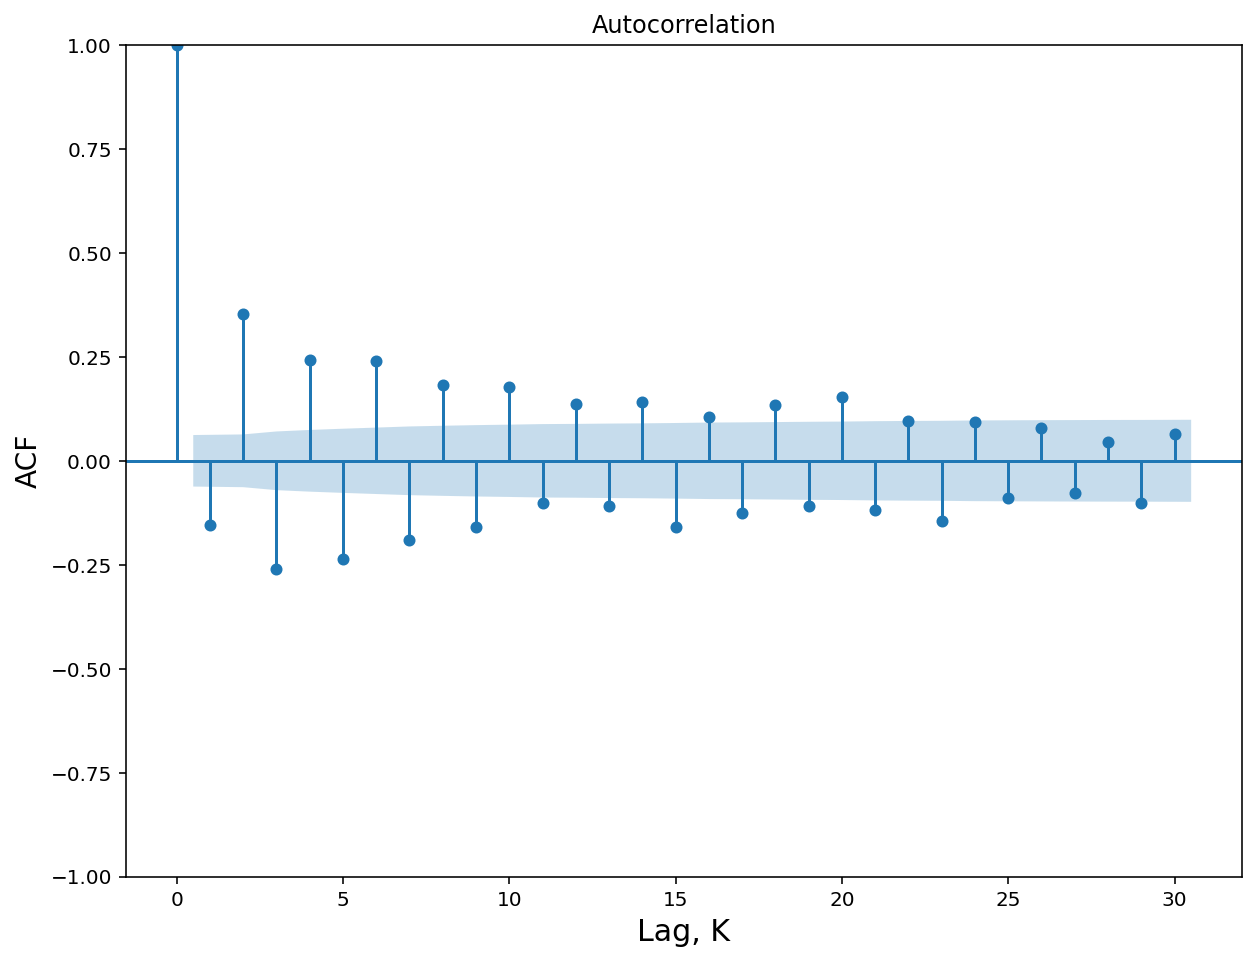

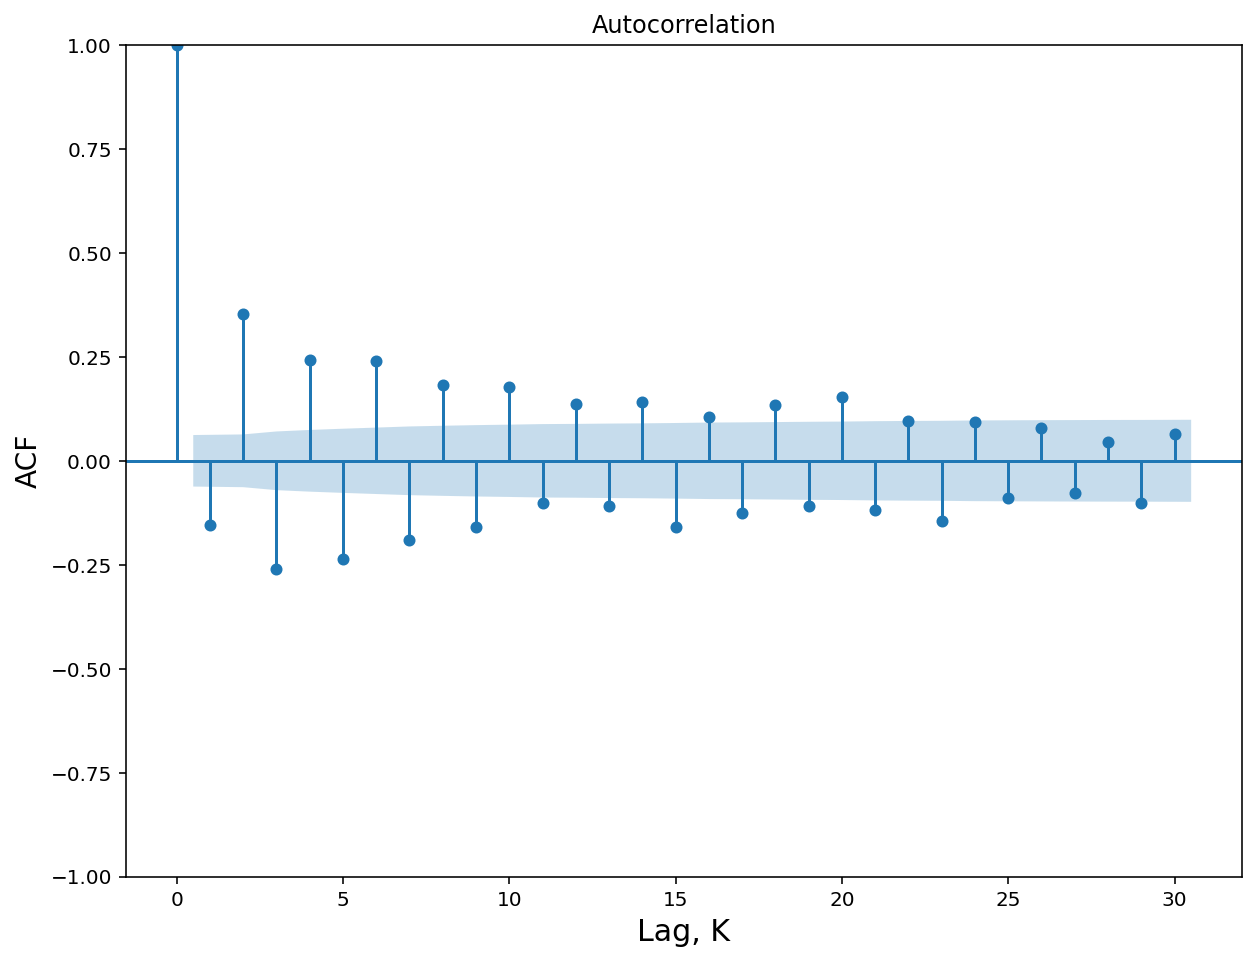

In [51]:
fig, ax = plt.subplots(dpi=144)
plt.xlabel('Lag, K', fontsize=15)
plt.ylabel('ACF', fontsize=14)

plot_acf(AR2_process, ax=ax)

In [52]:
# ADF (Augmented Dicky-Fuller) Test
# load in the data

import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt

df = read_csv(csvFile, header=0, index_col=0)
df = DataFrame(df.values)
df.columns = ['data']


df = read_csv(csvFile, header=0, index_col=0)

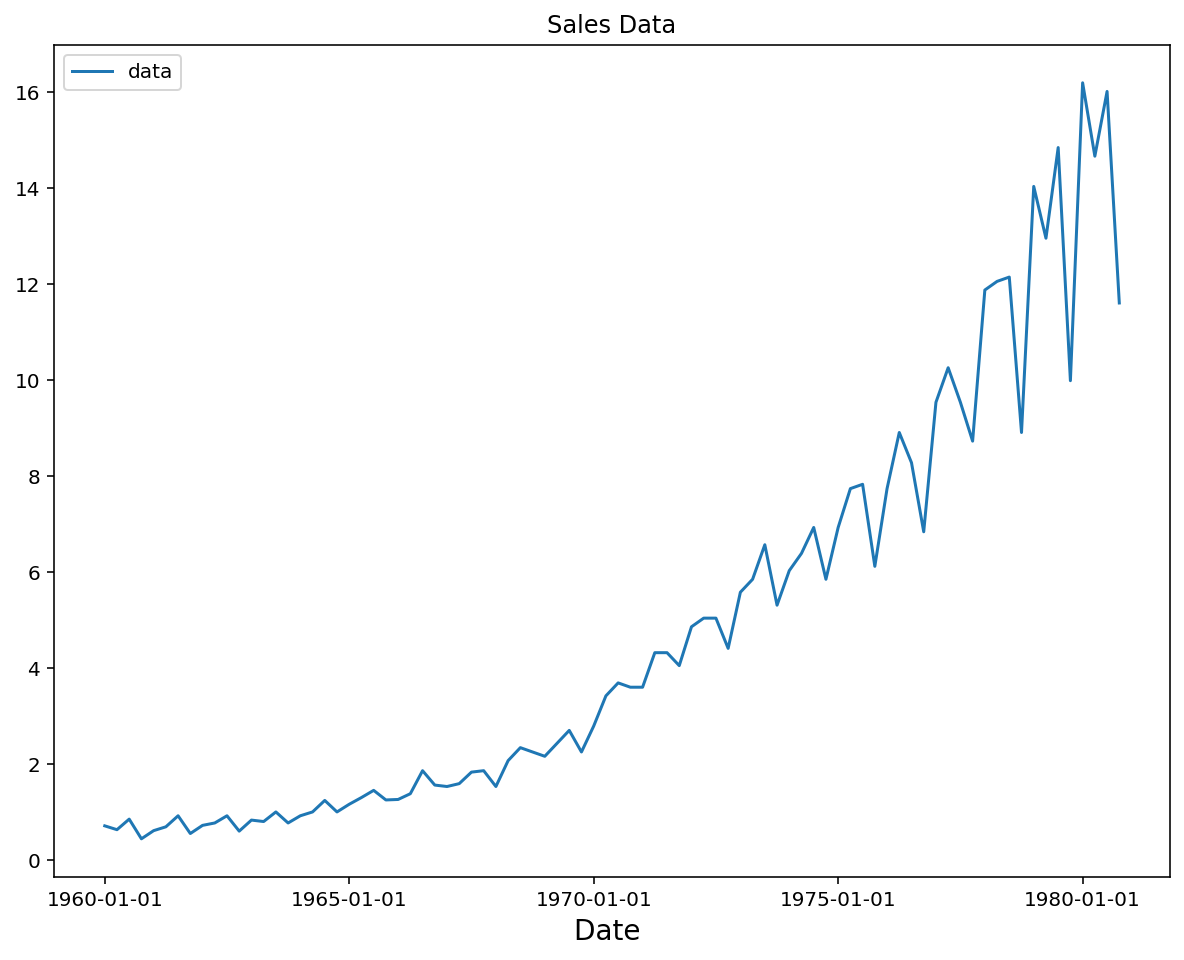

In [53]:
#plot

fig, ax = pyplot.subplots(dpi=144)
df.plot(title='Sales Data', ax=ax)
plt.xlabel('Date ', fontsize=14)
plt.show()

Text(0.5, 0, 'Lag, k')

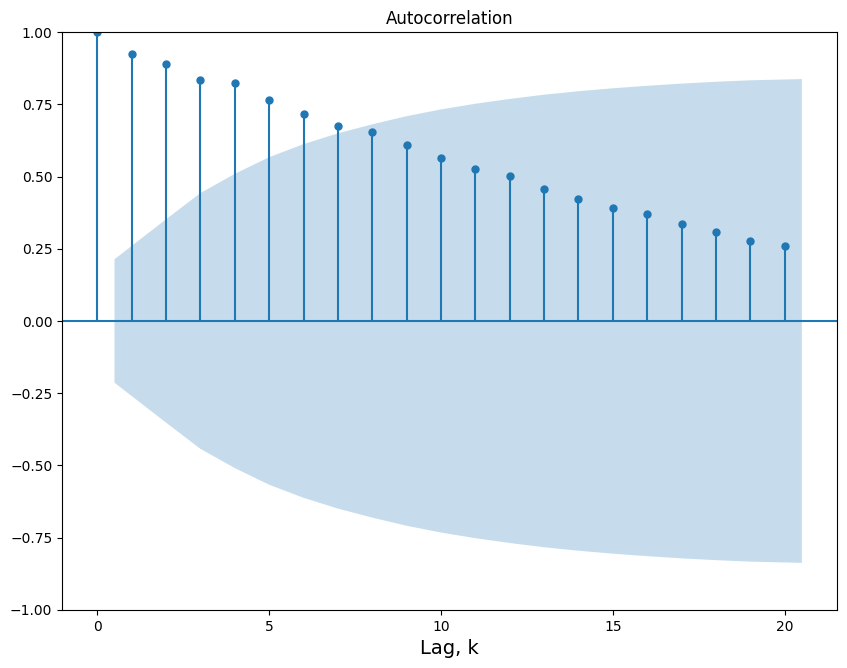

In [54]:
plot_acf(df)
plt.xlabel('Lag, k', fontsize=14)

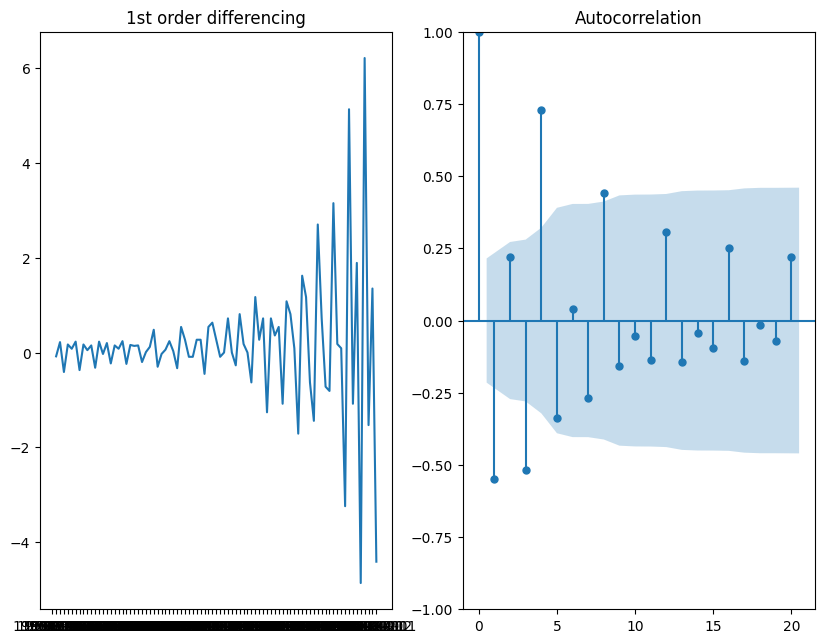

In [55]:
# using the differencing operator
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st order differencing')
ax1.plot(df.diff())

ax2 = f.add_subplot(122)
plot_acf(df.diff().dropna(), ax=ax2)
plt.show()

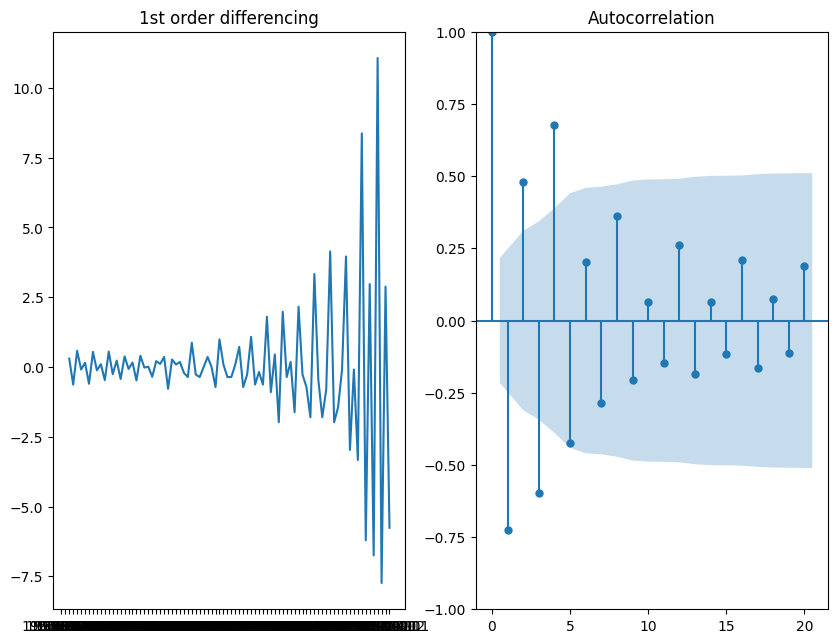

In [56]:
# using the differencing operator twice
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st order differencing')
ax1.plot(df.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(df.diff().diff().dropna(), ax=ax2)
plt.show()

In [57]:
# computing the ADF
result = adfuller(df.dropna())
print('p-vlaue: ', result[1])

result = adfuller(df.diff().dropna())
print('p-vlaue: ', result[1])

result = adfuller(df.diff().diff().dropna())
print('p-vlaue: ', result[1])

p-vlaue:  1.0
p-vlaue:  0.9088542416911305
p-vlaue:  0.006051099869603682


In [58]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(ts):
    result=adfuller(ts)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("P value is less than 0.05 that means we can reject the null hypothesis(Ho).")
        print("--> Therefore we can conclude that data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis that means time series has a unit root")
        print("--> Indicates the time series is non-stationary ")

In [59]:
# running on the first difference time series
adfuller_test(ts=df.dropna())

ADF Test Statistic : 2.7420165734574744
p-value : 1.0
#Lags Used : 11
Number of Observations Used : 72
Weak evidence against null hypothesis that means time series has a unit root
--> Indicates the time series is non-stationary 


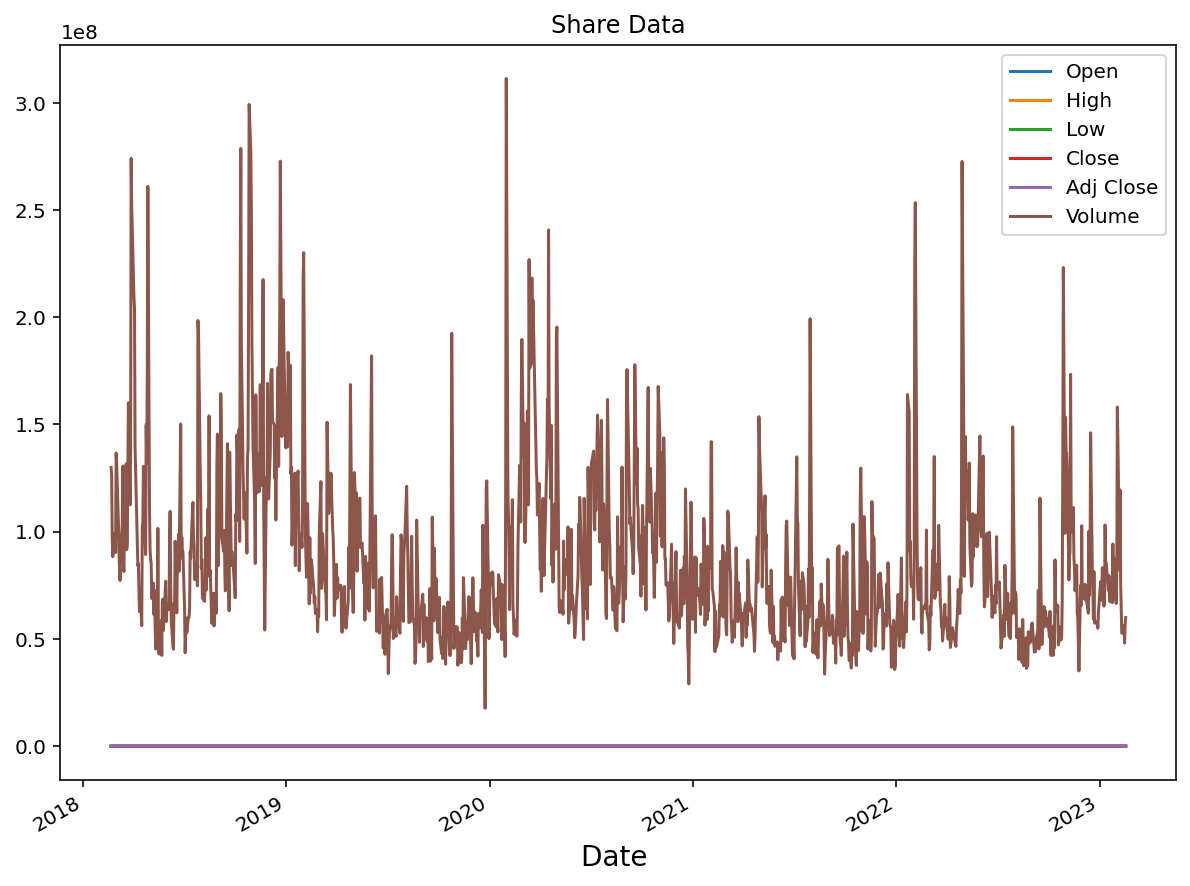

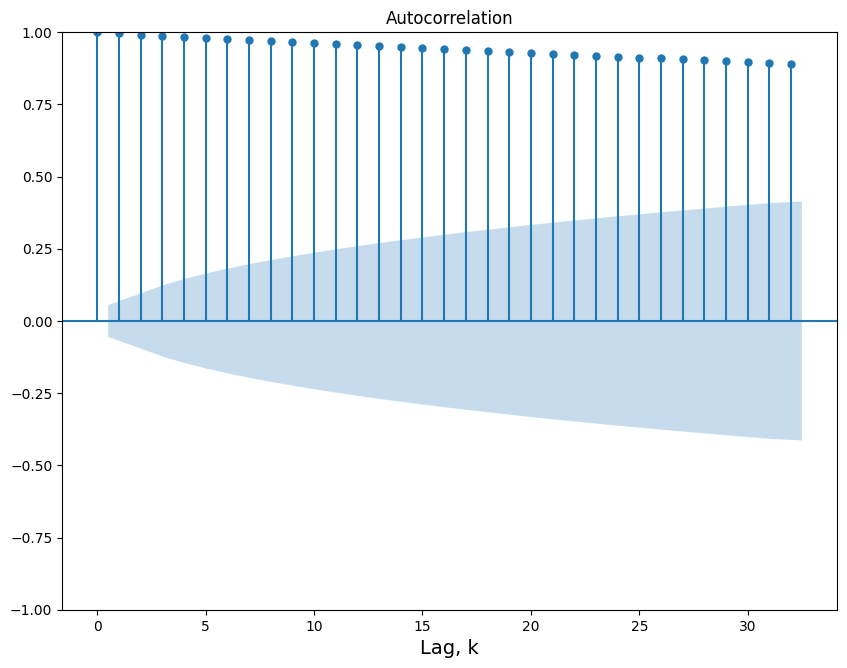

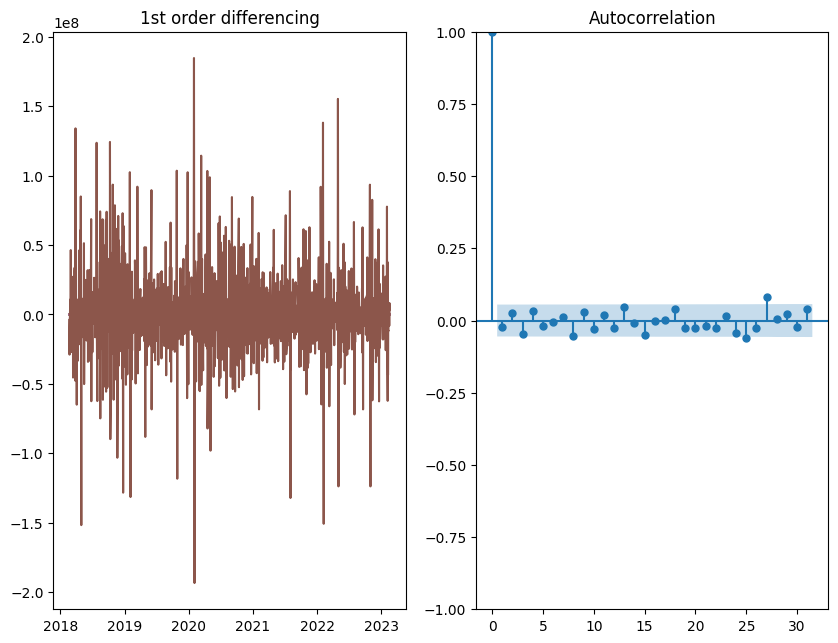

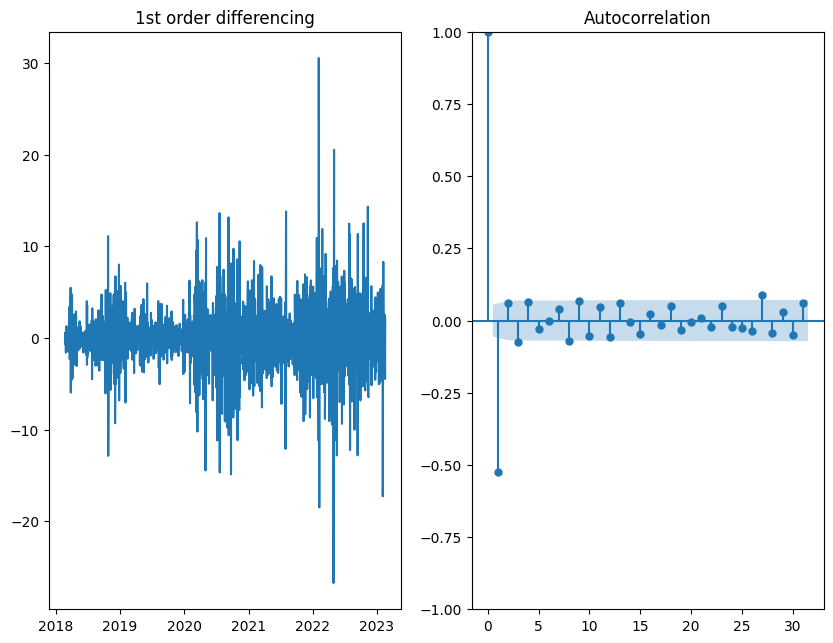

p-vlaue:  0.45297105465166737
p-vlaue:  0.0
p-vlaue:  1.2169841133728563e-23
ADF Test Statistic : -1.6578089913331728
p-value : 0.45297105465166737
#Lags Used : 0
Number of Observations Used : 1258
Weak evidence against null hypothesis that means time series has a unit root
--> Indicates the time series is non-stationary 


In [60]:
# ADF (Augmented Dicky-Fuller) Test using AMZN.csv dataset

import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt

AMZN_series = read_csv(csvFile2, header=0, index_col='Date', parse_dates=True)

# AMZN_series.head()

#plot

fig, ax = pyplot.subplots(dpi=144)
AMZN_series.plot(title='Share Data', ax=ax)
plt.xlabel('Date ', fontsize=14)
plt.show()

plot_acf(AMZN_series['Close'])
plt.xlabel('Lag, k', fontsize=14)

# using the differencing operator
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st order differencing')
ax1.plot(AMZN_series.diff())

ax2 = f.add_subplot(122)
plot_acf(AMZN_series['Close'].diff().dropna(), ax=ax2)
plt.show()

# using the differencing operator twice
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st order differencing')
ax1.plot(AMZN_series['Close'].diff().diff())

ax2 = f.add_subplot(122)
plot_acf(AMZN_series['Close'].diff().diff().dropna(), ax=ax2)
plt.show()

# computing the ADF
from statsmodels.tsa.stattools import adfuller
result = adfuller(AMZN_series['Close'].dropna())
print('p-vlaue: ', result[1])

result = adfuller(AMZN_series['Close'].diff().dropna())
print('p-vlaue: ', result[1])

result = adfuller(AMZN_series['Close'].diff().diff().dropna())
print('p-vlaue: ', result[1])

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(ts):
    result=adfuller(ts)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("P value is less than 0.05 that means we can reject the null hypothesis(Ho).")
        print("--> Therefore we can conclude that data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis that means time series has a unit root")
        print("--> Indicates the time series is non-stationary ")

# running on the first difference time series
adfuller_test(ts=AMZN_series['Close'].dropna())

In [61]:
# Forecast model
jj = read_csv(csvFile, index_col='date', parse_dates=True)
jj.index

DatetimeIndex(['1960-01-01', '1960-04-01', '1960-07-02', '1960-10-01',
               '1961-01-01', '1961-04-02', '1961-07-02', '1961-10-01',
               '1962-01-01', '1962-04-02', '1962-07-02', '1962-10-01',
               '1963-01-01', '1963-04-02', '1963-07-02', '1963-10-01',
               '1964-01-01', '1964-04-01', '1964-07-02', '1964-10-01',
               '1965-01-01', '1965-04-02', '1965-07-02', '1965-10-01',
               '1966-01-01', '1966-04-02', '1966-07-02', '1966-10-01',
               '1967-01-01', '1967-04-02', '1967-07-02', '1967-10-01',
               '1968-01-01', '1968-04-01', '1968-07-02', '1968-10-01',
               '1969-01-01', '1969-04-02', '1969-07-02', '1969-10-01',
               '1970-01-01', '1970-04-02', '1970-07-02', '1970-10-01',
               '1971-01-01', '1971-04-02', '1971-07-02', '1971-10-01',
               '1972-01-01', '1972-04-01', '1972-07-02', '1972-10-01',
               '1973-01-01', '1973-04-02', '1973-07-02', '1973-10-01',
      

<Axes: title={'center': 'Simple Moving Averages'}, xlabel='date'>

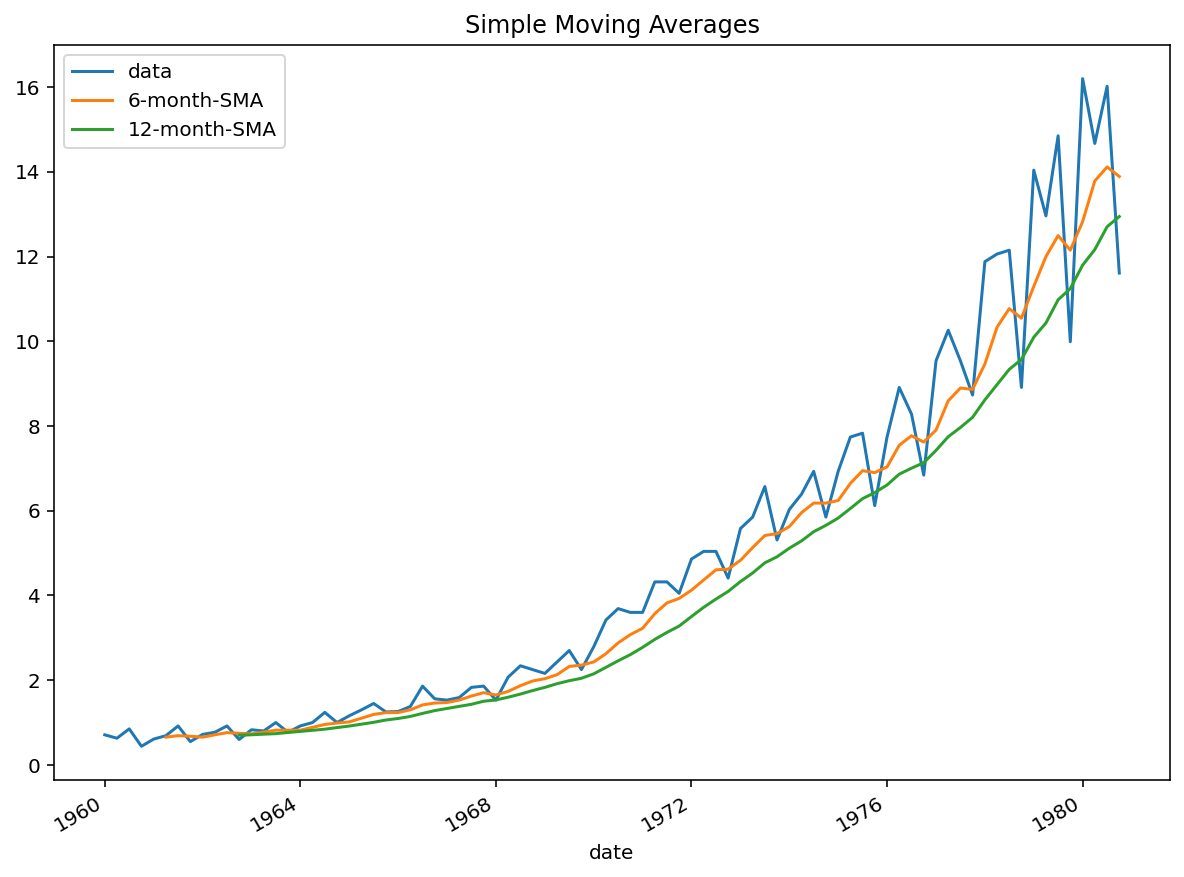

In [62]:
# simple moving average
jj['6-month-SMA'] = jj['data'].rolling(window=6).mean()
jj['12-month-SMA'] = jj['data'].rolling(window=12).mean()
bool_series = jj.duplicated()

fig, ax = pyplot.subplots(dpi=144)
jj.plot(title="Simple Moving Averages", ax=ax)

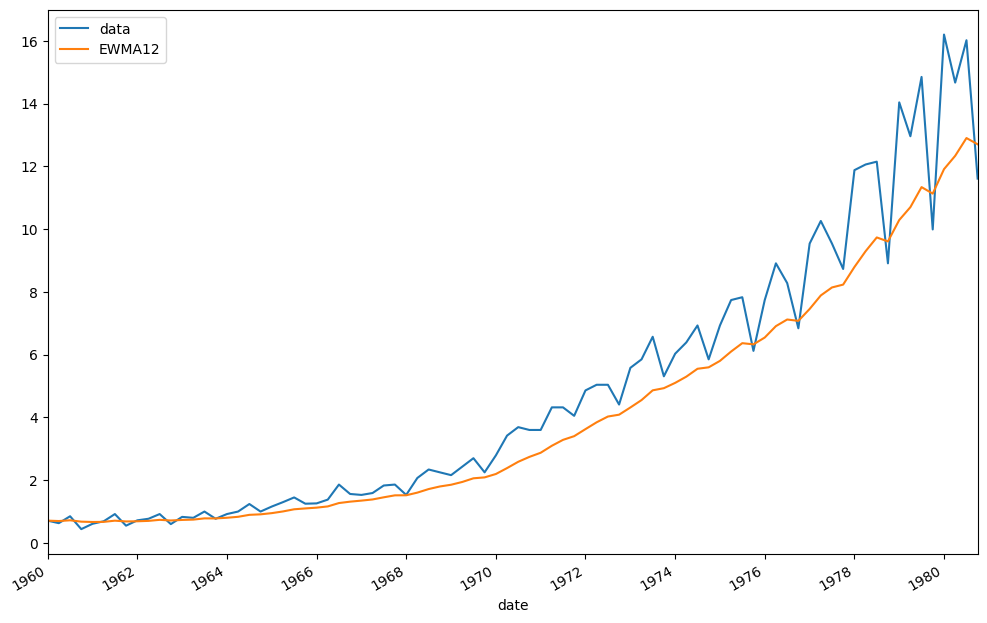

In [63]:
jj['EWMA12'] = jj['data'].ewm(span=12, adjust=False).mean()
jj[['data','EWMA12']].plot(figsize=(12,8)).autoscale(axis='x',tight=True)

In [64]:
df = pd.DataFrame({'B': [0,1,2,3,4]})
df.ewm(com=0.5).mean()

,B
0,0.000000
1,0.750000
2,1.615385
3,2.550000
4,3.520661


In [65]:
# forecasting
# splitting data into training and testing data
train_data = jj.iloc[:-12]
test_data = jj.iloc[-12:]

In [66]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(train_data['data'], trend='add', seasonal='mul', seasonal_periods=4)
fitted_model = model.fit()
fitted_model.summary()

Dep. Variable:,data,No. Observations:,72
Model:,ExponentialSmoothing,SSE,6.660
Optimized:,True,AIC,-155.399
Trend:,Additive,BIC,-137.186
Seasonal:,Multiplicative,AICC,-151.793
Seasonal Periods:,4,Date:,"Tue, 08 Apr 2025"
Box-Cox:,False,Time:,13:02:31
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2574005,alpha,True
smoothing_trend,0.2429053,beta,True


<Axes: xlabel='date'>

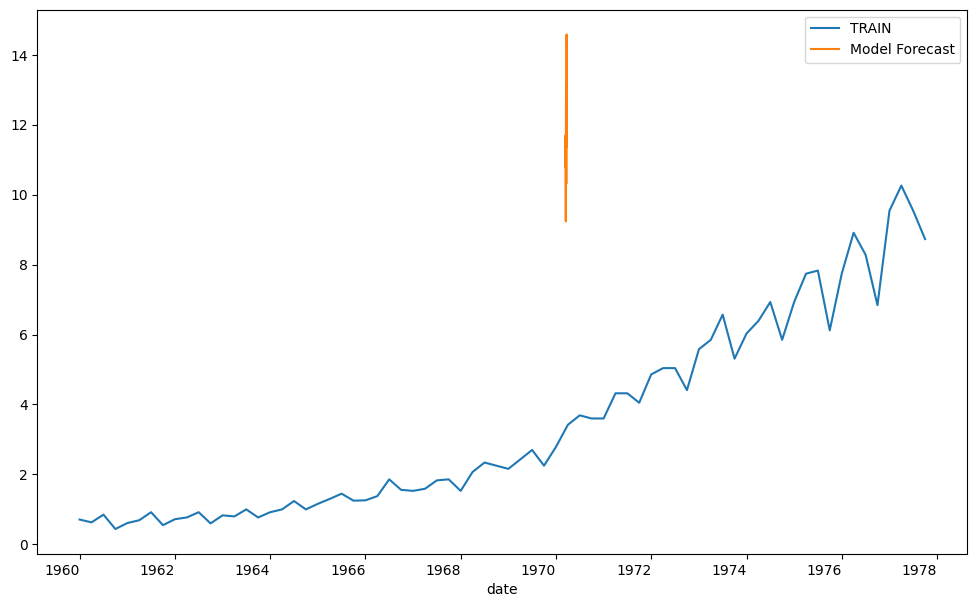

In [67]:
# predictions
test_predictions = fitted_model.forecast(12).rename('HW Forecast')
#plot
train_data['data'].plot(legend=True, label='TRAIN')
test_predictions.plot(legend=True, label='Model Forecast',figsize=(12,8))

<Axes: xlabel='date'>

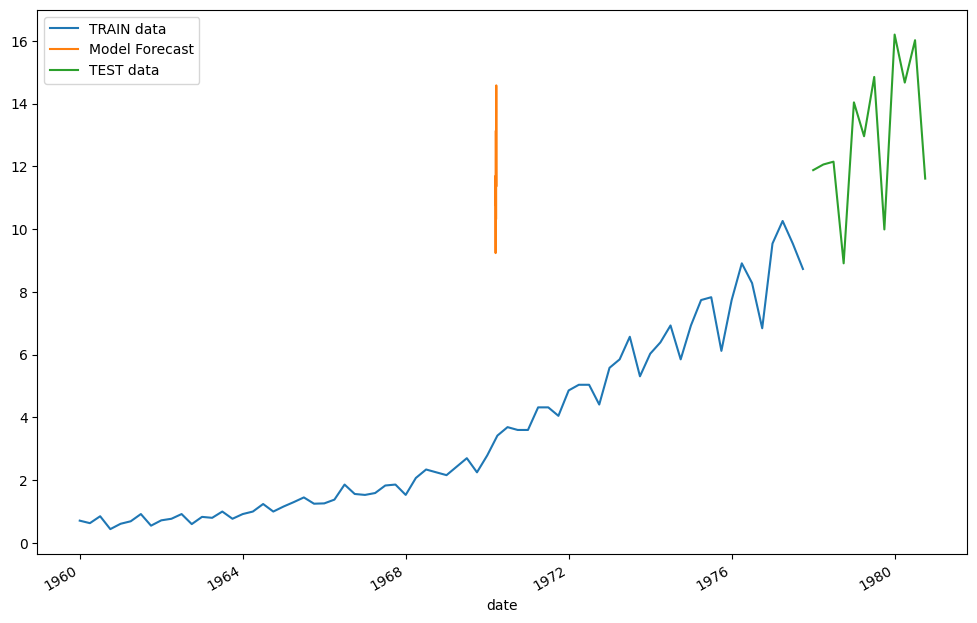

In [68]:
train_data['data'].plot(legend=True,label='TRAIN data')
test_predictions.plot(legend=True, label='Model Forecast')
test_data['data'].plot(legend=True,label='TEST data',figsize=(12,8))

In [69]:
# Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error
a = mean_absolute_error(test_data['data'],test_predictions)
b  = mean_squared_error(test_data['data'], test_predictions)
print('Mean Absolute error: %f' %a)
print('Mean Squared error: %f' %b)

Mean Absolute error: 1.074647
Mean Squared error: 2.035365


In [70]:
jj.describe()

,data,6-month-SMA,12-month-SMA,EWMA12
count,84.000000,79.000000,73.000000,84.000000
mean,4.799762,4.642278,4.452546,4.014464
std,4.309991,3.955260,3.570009,3.594142
min,0.440000,0.655000,0.700833,0.667432
25%,1.247500,1.268333,1.381667,0.990026
50%,3.510000,3.225000,3.277500,2.485186
75%,7.132500,6.990000,6.862500,6.337413
max,16.200000,14.115000,12.945000,12.902492


In [71]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 52.8 MB/s eta 0:00:00


In [72]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

model = ARIMA(jj['data'], order=(6,1,3))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   data   No. Observations:                   84
Model:                 ARIMA(6, 1, 3)   Log Likelihood                 -47.649
Date:                Tue, 08 Apr 2025   AIC                            115.297
Time:                        13:02:39   BIC                            139.486
Sample:                             0   HQIC                           125.015
                                 - 84                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4733      0.127    -11.640      0.000      -1.721      -1.225
ar.L2         -0.7728      0.148     -5.235      0.000      -1.062      -0.484
ar.L3          0.0382      0.063      0.610      0.5

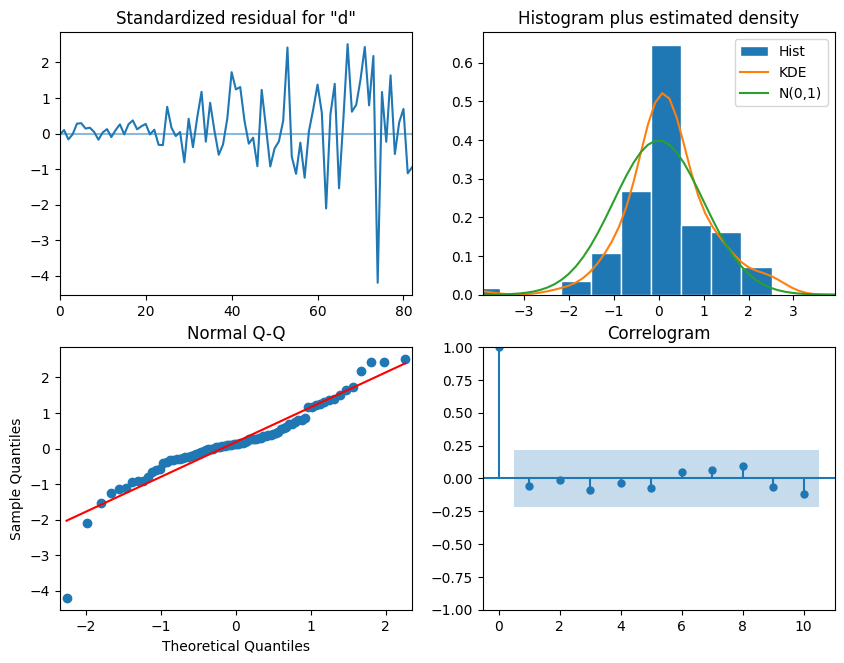

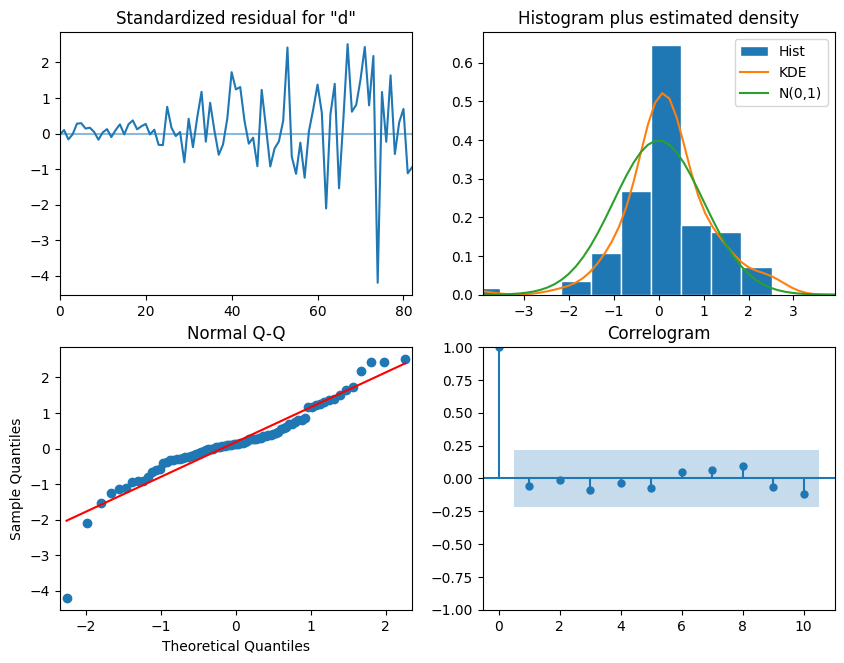

In [73]:
model_fit.plot_diagnostics()

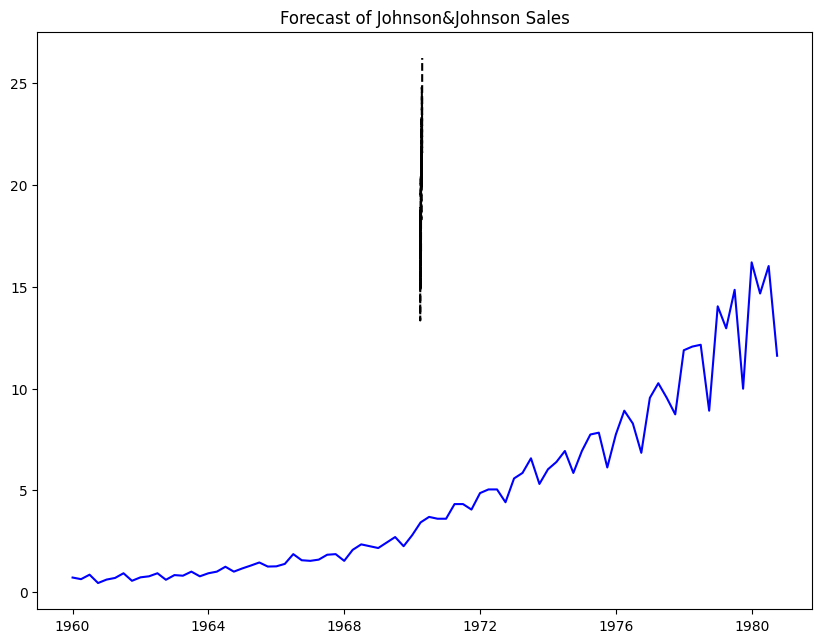

In [74]:
n_forecast = 24
predict = model_fit.get_prediction(end=model.nobs + n_forecast)
idx = np.arange(len(predict.predicted_mean))
fig, ax = plt.subplots()
ax.plot(jj['data'], 'blue')
ax.plot(idx[-n_forecast:], predict.predicted_mean[-n_forecast:], 'k--')
ax.set(title='Forecast of Johnson&Johnson Sales')
plt.show()

In [75]:
predictions_int = model_fit.get_forecast(steps=24)
predictions_int.predicted_mean

,predicted_mean
84,17.336626
85,16.481965
86,17.203514
87,13.344421
88,18.924689
89,17.790273
90,18.762096
91,14.903689
92,20.454214
93,19.287892


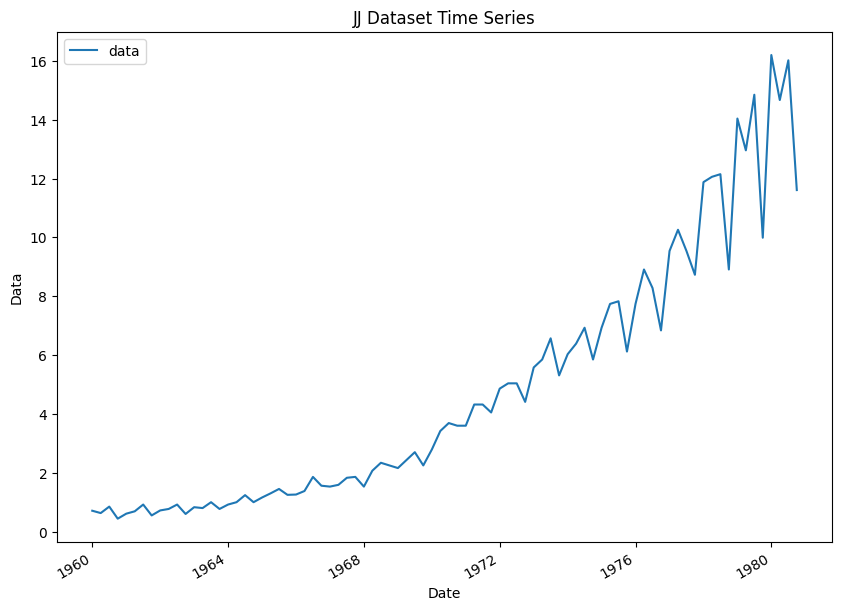

   var1(t-1)
1   0.017132
2   0.012056
3   0.026015
4   0.000000
5   0.010787
(66, 1, 0) (66,) (17, 1, 0) (17,)
Epoch 1/50
66/66 - 4s - 59ms/step - loss: 0.0738 - val_loss: 0.4735
Epoch 2/50
66/66 - 0s - 6ms/step - loss: 0.1638 - val_loss: 0.5409
Epoch 3/50
66/66 - 0s - 7ms/step - loss: 0.1398 - val_loss: 0.5520
Epoch 4/50
66/66 - 0s - 7ms/step - loss: 0.1385 - val_loss: 0.5608
Epoch 5/50
66/66 - 1s - 9ms/step - loss: 0.1347 - val_loss: 0.5609
Epoch 6/50
66/66 - 1s - 11ms/step - loss: 0.1342 - val_loss: 0.5610
Epoch 7/50
66/66 - 0s - 6ms/step - loss: 0.1365 - val_loss: 0.5691
Epoch 8/50
66/66 - 1s - 13ms/step - loss: 0.1331 - val_loss: 0.5693
Epoch 9/50
66/66 - 1s - 21ms/step - loss: 0.1326 - val_loss: 0.5694
Epoch 10/50
66/66 - 2s - 23ms/step - loss: 0.1322 - val_loss: 0.5696
Epoch 11/50
66/66 - 0s - 8ms/step - loss: 0.1318 - val_loss: 0.5698
Epoch 12/50
66/66 - 1s - 9ms/step - loss: 0.1337 - val_loss: 0.5766
Epoch 13/50
66/66 - 1s - 11ms/step - loss: 0.1309 - val_loss: 0.5766
Epoch 1

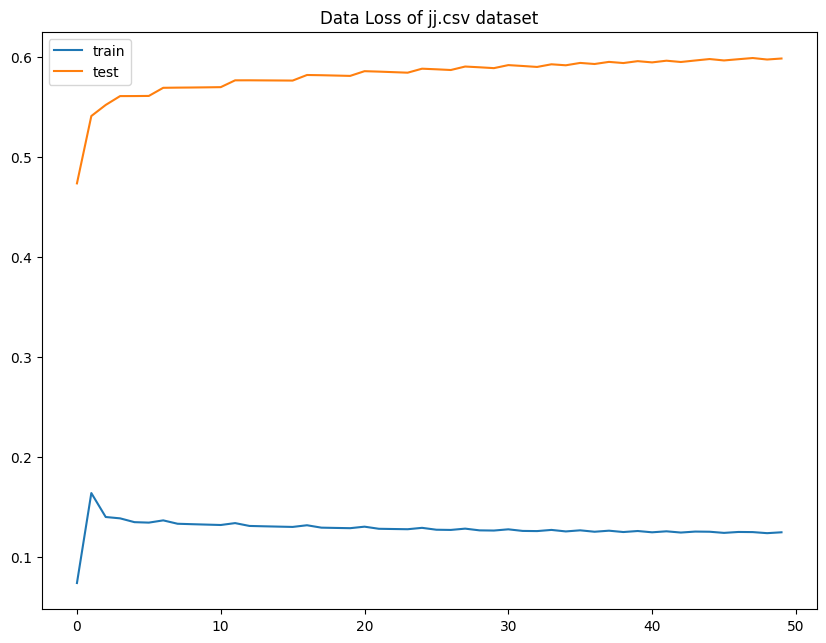

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Test RMSE: 9.832


In [76]:
# LSTM using jj.csv dataset
from pandas import DataFrame, concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from math import sqrt

# Load dataset
def parse_dates(x):
    return pd.to_datetime(x, format='%Y-%m-%d')

dataset = pd.read_csv('sample_data/jj.csv', parse_dates=['date'], index_col='date', date_parser=parse_dates)
# print(dataset.head())

# Plot raw data
dataset.plot()
plt.title("JJ Dataset Time Series")
plt.xlabel("Date")
plt.ylabel("Data")
plt.show()

# Convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    df = DataFrame(data)
    cols, names = list(), list()

    # Input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(df.shape[1])]

    # Forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(df.shape[1])]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(df.shape[1])]

    # Concatenate all together
    agg = concat(cols, axis=1)
    agg.columns = names

    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# Normalize data
values = dataset.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# Frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# Drop columns we don't want to predict
reframed.drop(reframed.columns[1], axis=1, inplace=True)
print(reframed.head())

# Split into train and test sets
values = reframed.values
n_train = int(len(values) * 0.8)  # 80% train, 20% test
train = values[:n_train, :]
test = values[n_train:, :]

# Split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# Reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# Design LSTM network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# Fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=1, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# Plot loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Data Loss of jj.csv dataset")
plt.show()

# Make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# Invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, 0]

# Invert scaling for actual values
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]

# Calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print(f'Test RMSE: {rmse:.3f}')

Epoch 1/50
14/14 - 2s - 147ms/step - loss: 0.1682 - val_loss: 0.0897
Epoch 2/50
14/14 - 0s - 27ms/step - loss: 0.1292 - val_loss: 0.0806
Epoch 3/50
14/14 - 0s - 22ms/step - loss: 0.1148 - val_loss: 0.0716
Epoch 4/50
14/14 - 0s - 10ms/step - loss: 0.1045 - val_loss: 0.0667
Epoch 5/50
14/14 - 0s - 7ms/step - loss: 0.0948 - val_loss: 0.0631
Epoch 6/50
14/14 - 0s - 7ms/step - loss: 0.0889 - val_loss: 0.0624
Epoch 7/50
14/14 - 0s - 10ms/step - loss: 0.0848 - val_loss: 0.0634
Epoch 8/50
14/14 - 0s - 10ms/step - loss: 0.0828 - val_loss: 0.0649
Epoch 9/50
14/14 - 0s - 7ms/step - loss: 0.0810 - val_loss: 0.0653
Epoch 10/50
14/14 - 0s - 8ms/step - loss: 0.0807 - val_loss: 0.0660
Epoch 11/50
14/14 - 0s - 8ms/step - loss: 0.0791 - val_loss: 0.0655
Epoch 12/50
14/14 - 0s - 10ms/step - loss: 0.0795 - val_loss: 0.0658
Epoch 13/50
14/14 - 0s - 10ms/step - loss: 0.0778 - val_loss: 0.0645
Epoch 14/50
14/14 - 0s - 8ms/step - loss: 0.0789 - val_loss: 0.0672
Epoch 15/50
14/14 - 0s - 10ms/step - loss: 0.076

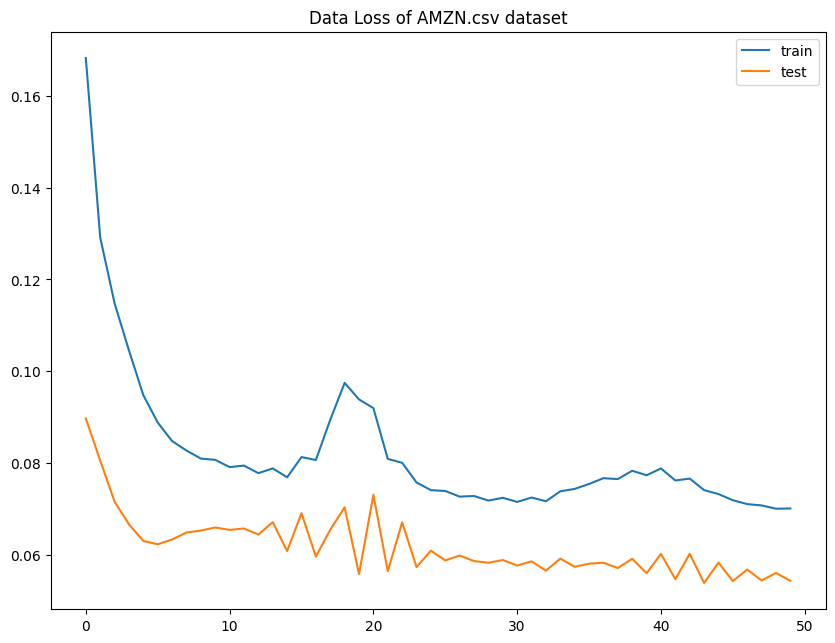

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Test RMSE: 10.031


In [77]:
# LSTM Using AMZN.csv dataset
from datetime import datetime
def parse_dates(x):
    return datetime.strptime(x, '%Y-%m-%d')

# Load dataset
dataset = pd.read_csv('sample_data/AMZN.csv', parse_dates=['Date'], date_parser=parse_dates, index_col='Date')

# Select relevant columns (Close price for prediction)
dataset = dataset[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset.values)

# Convert time series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()

    # Input sequence (t-n, ..., t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [(f'var{j+1}(t-{i})') for j in range(n_vars)]

    # Forecast sequence (t, t+1, ..., t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [(f'var{j+1}(t)') for j in range(n_vars)]
        else:
            names += [(f'var{j+1}(t+{i})') for j in range(n_vars)]

    agg = pd.concat(cols, axis=1)
    agg.columns = names

    if dropnan:
        agg.dropna(inplace=True)

    return agg

# Convert the dataset into supervised format
reframed = series_to_supervised(scaled, 1, 1)

# Split data into training and testing sets
values = reframed.values
n_train_days = int(len(values) * 0.8)  # 80% training, 20% testing
train = values[:n_train_days, :]
test = values[n_train_days:, :]

# Split into input (X) and output (y)
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# Reshape input for LSTM
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# Build LSTM Model
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# Train the model
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# Plot loss during training
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title("Data Loss of AMZN.csv dataset")
plt.show()

# Make predictions
yhat = model.predict(test_X)

test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# Invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -5:]), axis=1)  # Keep last 5 features only (if applicable)
inv_yhat = scaler.inverse_transform(inv_yhat)  # Rescale back
inv_yhat = inv_yhat[:, 0]  # Extract predictions

# Invert scaling for actual values
test_y = test_y.reshape((len(test_y), 1))  # Reshape to match dimensions
inv_y = np.concatenate((test_y, test_X[:, -5:]), axis=1)  # Keep last 5 features only
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]  # Extract actual values



# Evaluate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print(f'Test RMSE: {rmse:.3f}')